In [2]:
import sys
print(sys.executable)

/usr/bin/python3


In [3]:
! pip install -q keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 6.6 MB/s eta 0:00:00


In [4]:
! pip install tensorflow

In [ ]:
#!pip install --upgrade pip

In [5]:
import jax

In [6]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "jax"

# Note that keras_core should only be imported after the backend
# has been configured. The backend cannot be changed once the
# package is imported.
import keras_core as keras

Using JAX backend.


In [7]:
keras

<module 'keras_core' from '/usr/local/lib/python3.10/dist-packages/keras_core/__init__.py'>

In [8]:
# get the data
!pip install yfinance

In [9]:
import yfinance as yf

In [10]:
start_date = '2006-01-01'
end_date = '2023-12-31'

# Add multiple space separated tickers here
ticker = 'VTI AGG DBC VIXY ^VIX'
data = yf.download(ticker, start_date, end_date)
print(data.head())
print(data.tail())

[*********************100%%**********************]  5 of 5 completed
            Adj Close                                  Close           \
                  AGG DBC VIXY        VTI   ^VIX         AGG DBC VIXY   
Date                                                                    
2006-01-03  58.752556 NaN  NaN  45.043755  11.14  100.639999 NaN  NaN   
2006-01-04  58.892632 NaN  NaN  45.371281  11.37  100.879997 NaN  NaN   
2006-01-05  58.892632 NaN  NaN  45.342487  11.31  100.879997 NaN  NaN   
2006-01-06  58.758373 NaN  NaN  45.788765  11.00  100.650002 NaN  NaN   
2006-01-09  58.822563 NaN  NaN  45.957932  11.13  100.760002 NaN  NaN   

                              ...        Open                             \
                  VTI   ^VIX  ...         AGG DBC VIXY        VTI   ^VIX   
Date                          ...                                          
2006-01-03  62.575001  11.14  ...  100.470001 NaN  NaN  61.855000  12.25   
2006-01-04  63.029999  11.37  ...  100.690

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# import optax
# import yfinance as yf
# from ml.ml_utils import  binary_classification_metrics
from datetime import datetime

In [ ]:
# needed this on mac to get autocomplete to work
# %config Completer.use_jedi = False

### What device is being used for computing?

Use conda to install cuda: conda install cuda -c nvidia

In [ ]:
jax.devices()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


[CpuDevice(id=0)]

In [ ]:
jax.devices()[0].platform

'cpu'

In [ ]:
def jax_has_gpu():
    try:
        _ = jax.device_put(jax.numpy.ones(1), device=jax.devices('gpu')[0])
        return True
    except:
        return False
jax_has_gpu()

False

### Fully connected neural network.

$x \in R^n$, an input vector, transformed to a vector of length $m$ via
$$
x = xW + b, \newline
x = activation\_function(x),
$$
where $W \in R^{n\times m}, b \in R^m$.
This represents one layer of the network. The final layer transforms to the dimension of the output, and in case of classsification - sigmoid.


In [ ]:
# A link to the data is availailable in the following blog post
# https://scipython.com/blog/a-shallow-neural-network-for-simple-nonlinear-classification/
df = pd.read_csv('../non_linear_class_example/labeled_points.txt', sep=' ',
                usecols=[1,3,5], names=['x1', 'x2', 'label'])

In [ ]:
df.head()

,x1,x2,label
0,0.50873,0.08490,1
1,0.96767,0.96752,1
2,0.72096,0.90628,1
3,0.66071,0.32757,1
4,0.48690,0.58265,0


In [ ]:
df.shape

(2506, 3)

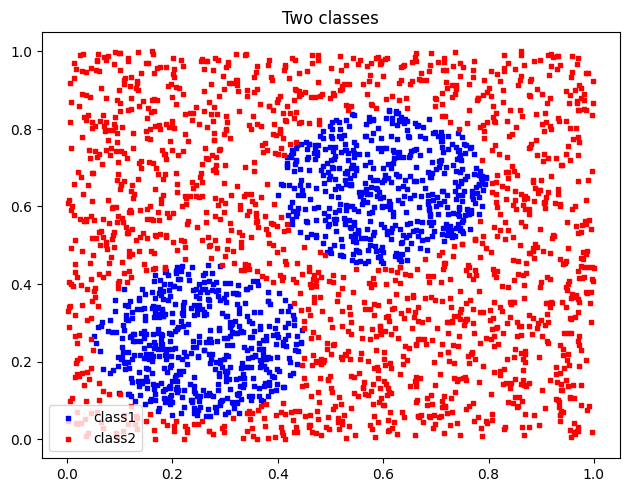

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
df_cl1 = df[df.label == 0]
df_cl2 = df[df.label == 1]
ax1.scatter(df_cl1.x1, df_cl1.x2, s=5, c='b', marker="s", label='class1')
ax1.scatter(df_cl2.x1, df_cl2.x2, s=5, c='r', marker="s", label='class2')
fig.tight_layout()
plt.title('Two classes')
plt.legend()


In [ ]:
#
x = np.array(df[['x1', 'x2']])
y = np.array(df['label'])
print(x.shape)
print(y.shape)

(2506, 2)
(2506,)


In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.3, random_state=212
)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(list(map(lambda i: i.shape, (X_train, X_test, y_train, y_test))))
print(y_train.sum(), y_test.sum())

[(1754, 2), (752, 2), (1754, 2), (752, 2)]
1754.0 752.0


In [ ]:
# adjust dim
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)
print(list(map(lambda i: i.shape, (X_train, X_test, y_train, y_test))))
print(y_train.sum(), y_test.sum())

[(1754, 1, 2), (752, 1, 2), (1754,), (752,)]
1051 451


In [ ]:
X_train

array([[0.78773, 0.50679],
       [0.741  , 0.72341],
       [0.71376, 0.54406],
       ...,
       [0.6239 , 0.37316],
       [0.46939, 0.59623],
       [0.62713, 0.77273]])

In [ ]:
keras.utils.to_categorical(y_train)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
# keras sequential
num_classes = 2
input_shape = (2,)
hidden_dim = 128

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Dense(hidden_dim, activation="relu"),
        keras.layers.Dense(hidden_dim, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)               │        384 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_20 (Dense)                │ (None, 128)               │     16,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_21 (Dense)                │ (None, 2)                 │        258 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 17,154 (536.06 KB)

 Trainable params: 17,154 (536.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.CategoricalAccuracy(name="acc"),
        keras.metrics.AUC(name='auc')
    ],
)

In [ ]:
batch_size = 128
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
]

model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9248 - auc: 0.9565 - loss: 0.2458 - val_acc: 0.9280 - val_auc: 0.9638 - val_loss: 0.1842
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9242 - auc: 0.9577 - loss: 0.2412 - val_acc: 0.9318 - val_auc: 0.9626 - val_loss: 0.1838
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9274 - auc: 0.9601 - loss: 0.2340 - val_acc: 0.9242 - val_auc: 0.9630 - val_loss: 0.1803
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9375 - auc: 0.9699 - loss: 0.2090 - val_acc: 0.9394 - val_auc: 0.9638 - val_loss: 0.1799
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9234 - auc: 0.9588 - loss: 0.2392 - val_acc: 0.9280 - val_auc: 0.9645 - val_loss: 0.1831
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9207 - auc: 0.9583 - loss: 0.2415 - val_acc: 0.9205 - val_auc: 0.9637 - val_loss: 0.1812
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9271 - auc: 0.9613 - loss: 0.2287 - val_acc: 0

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9263 - auc: 0.9744 - loss: 0.2031 - val_acc: 0.9394 - val_auc: 0.9763 - val_loss: 0.1550
Epoch 46/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9218 - auc: 0.9737 - loss: 0.2056 - val_acc: 0.9356 - val_auc: 0.9755 - val_loss: 0.1545
Epoch 47/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9290 - auc: 0.9752 - loss: 0.2053 - val_acc: 0.9394 - val_auc: 0.9776 - val_loss: 0.1538
Epoch 48/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9151 - auc: 0.9723 - loss: 0.2162 - val_acc: 0.9280 - val_auc: 0.9786 - val_loss: 0.1515
Epoch 49/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9293 - auc: 0.9767 - loss: 0.1993 - val_acc: 0.9205 - val_auc: 0.9760 - val_loss: 0.1621
Epoch 50/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9151 - auc: 0.9738 - loss: 0.2126 - val_acc: 0.9242 - val_auc: 0.9775 - val_loss: 0.1621
Epoch 51/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9313 - auc: 0.9764 - loss: 0.2006 - val_acc: 0.9356 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9638 - auc: 0.9960 - loss: 0.1239 - val_acc: 0.9697 - val_auc: 0.9948 - val_loss: 0.0980
Epoch 90/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9576 - auc: 0.9962 - loss: 0.1155 - val_acc: 0.9470 - val_auc: 0.9947 - val_loss: 0.0925
Epoch 91/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9384 - auc: 0.9926 - loss: 0.1296 - val_acc: 0.9659 - val_auc: 0.9949 - val_loss: 0.0937
Epoch 92/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9673 - auc: 0.9968 - loss: 0.1076 - val_acc: 0.9621 - val_auc: 0.9956 - val_loss: 0.0956
Epoch 93/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9593 - auc: 0.9959 - loss: 0.1183 - val_acc: 0.9735 - val_auc: 0.9979 - val_loss: 0.0913
Epoch 94/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9681 - auc: 0.9954 - loss: 0.1257 - val_acc: 0.9583 - val_auc: 0.9939 - val_loss: 0.1044
Epoch 95/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9631 - auc: 0.9964 - loss: 0.1155 - val_acc: 0.9773 

In [ ]:
score

[0.09887848049402237, 0.9694148898124695, 0.9976348876953125]

In [ ]:
model.layers[2].output

<KerasTensor shape=(None, 2), dtype=float32, name=keras_tensor_32>

In [ ]:
model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step      


array([[1.6266550e-04, 9.9983728e-01],
       [9.9050832e-01, 9.4917193e-03],
       [2.9077446e-10, 1.0000000e+00],
       ...,
       [9.8016912e-01, 1.9830808e-02],
       [8.7597519e-01, 1.2402478e-01],
       [1.9679922e-01, 8.0320078e-01]], dtype=float32)

In [ ]:
keras.metrics.categorical_accuracy(model.predict(X_test), y_test).mean()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step      


Array(0.9694149, dtype=float32)

In [ ]:
# now functional model definition
num_classes = 2
input_shape = (2,)
hidden_dim = 128

def create_model(input_dim, output_dim):
    inputs = keras.layers.Input(shape=input_dim)
    x = keras.layers.Dense(units=hidden_dim, activation='relu')(inputs)
    x = keras.layers.Dense(units=hidden_dim, activation='relu')(x)
    outputs = keras.layers.Dense(units=output_dim, activation='softmax')(x)
    return keras.Model(inputs=inputs, outputs=outputs)

model = create_model(input_shape, 2)

In [ ]:
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 2)                 │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_23 (Dense)                │ (None, 128)               │        384 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_24 (Dense)                │ (None, 128)               │     16,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_25 (Dense)                │ (None, 2)                 │        258 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 17,154 (536.06 KB)

 Trainable params: 17,154 (536.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.CategoricalAccuracy(name="acc"),
        keras.metrics.AUC(name='auc')
    ],
)

In [ ]:
batch_size = 128
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
]

model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - acc: 0.5332 - auc: 0.5695 - loss: 0.6821 - val_acc: 0.5871 - val_auc: 0.7559 - val_loss: 0.6270
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6093 - auc: 0.7424 - loss: 0.6366 - val_acc: 0.5871 - val_auc: 0.7807 - val_loss: 0.5970
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5777 - auc: 0.7528 - loss: 0.6281 - val_acc: 0.5871 - val_auc: 0.8017 - val_loss: 0.5733
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6182 - auc: 0.8064 - loss: 0.5793 - val_acc: 0.5871 - val_auc: 0.8039 - val_loss: 0.5390
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6284 - auc: 0.7984 - loss: 0.5575 - val_acc: 0.7652 - val_auc: 0.8578 - val_loss: 0.5124
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7310 - auc: 0.8375 - loss: 0.5200 - val_acc: 0.7917 - val_auc: 0.8808 - val_loss: 0.4705
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7630 - auc: 0.8792 - loss: 0.4862 - val_acc:

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8976 - auc: 0.9504 - loss: 0.2719 - val_acc: 0.9091 - val_auc: 0.9614 - val_loss: 0.2018
Epoch 46/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9170 - auc: 0.9606 - loss: 0.2437 - val_acc: 0.9242 - val_auc: 0.9632 - val_loss: 0.1903
Epoch 47/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9304 - auc: 0.9609 - loss: 0.2374 - val_acc: 0.9053 - val_auc: 0.9619 - val_loss: 0.1965
Epoch 48/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9038 - auc: 0.9548 - loss: 0.2585 - val_acc: 0.9167 - val_auc: 0.9634 - val_loss: 0.1920
Epoch 49/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9288 - auc: 0.9640 - loss: 0.2349 - val_acc: 0.9394 - val_auc: 0.9638 - val_loss: 0.1853
Epoch 50/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9247 - auc: 0.9604 - loss: 0.2411 - val_acc: 0.9242 - val_auc: 0.9652 - val_loss: 0.1858
Epoch 51/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9202 - auc: 0.9530 - loss: 0.2571 - val_acc: 0.9318 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9344 - auc: 0.9815 - loss: 0.1846 - val_acc: 0.9394 - val_auc: 0.9829 - val_loss: 0.1467
Epoch 90/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9313 - auc: 0.9824 - loss: 0.1836 - val_acc: 0.9318 - val_auc: 0.9838 - val_loss: 0.1404
Epoch 91/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9256 - auc: 0.9795 - loss: 0.1943 - val_acc: 0.9356 - val_auc: 0.9849 - val_loss: 0.1391
Epoch 92/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9374 - auc: 0.9844 - loss: 0.1754 - val_acc: 0.9318 - val_auc: 0.9846 - val_loss: 0.1414
Epoch 93/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9261 - auc: 0.9817 - loss: 0.1866 - val_acc: 0.9280 - val_auc: 0.9848 - val_loss: 0.1405
Epoch 94/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9199 - auc: 0.9817 - loss: 0.1912 - val_acc: 0.9280 - val_auc: 0.9845 - val_loss: 0.1456
Epoch 95/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9274 - auc: 0.9826 - loss: 0.1842 - val_acc: 0.9280 

In [ ]:
score

[0.16420626640319824, 0.9321808218955994, 0.9880088567733765]

In [ ]:
# LSTM


In [13]:
# text data
import io
path = keras.utils.get_file(
    "nietzsche.txt", origin="https://s3.amazonaws.com/text-datasets/nietzsche.txt"
)
with io.open(path, encoding="utf-8") as f:
    text = f.read().lower()
text = text.replace("\n", " ")  # We remove newlines chars for nicer display
print("Corpus length:", len(text))

chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

Corpus length: 600893
Total chars: 56


In [18]:
# char_indices
# indices_char

In [23]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=int)
y = np.zeros((len(sentences), len(chars)), dtype=int)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 200285


In [25]:
np.sum(x[0])

40

In [27]:
x[0].shape

(40, 56)

In [32]:
model = keras.Sequential(
    [
        keras.Input(shape=(maxlen, len(chars))),
        keras.layers.LSTM(128),
        keras.layers.Dense(len(chars), activation="softmax"),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)

In [33]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [34]:
import random
epochs = 10
batch_size = 128

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print()
    print("Generating text after epoch: %d" % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print("...Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + maxlen]
        print('...Generating with seed: "' + sentence + '"')

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        print("...Generated: ", generated)
        print()

1565/1565 ━━━━━━━━━━━━━━━━━━━━ 111s 69ms/step - loss: 2.8613

Generating text after epoch: 0
...Diversity: 0.2
...Generating with seed: "to whom it has not yet occurred that he "
...Generated:  and the an the and and inge and the and the sat he the an the re and the in the an the ath e and the an the s athe an the an the the ant he ans the the at the and and te and the and so thee man the the an the the ant he ant athe se the and of the ant ion the ret athe and the and at his the an the ares the and at he the at he and an the and and the ins the ant he an the the and the ant ise the an t

...Diversity: 0.5
...Generating with seed: "to whom it has not yet occurred that he "
...Generated:  at re fan md ato wh acith ean d and ainte thos a with mae nnd aante or fore these it atein st he rte on whe whin and nto deer atn itha rered fan sbe to an oth  athe the se fincno the araly t he and issti thes ant iten adcera inte thna to wnet itos t hin on w hoe atn ith th aen ther ad thealy tein th er

In [ ]:
model.get_layer(name='dense_18')

<Dense name=dense_18, built=True>

In [ ]:
#first point
print(x[0])
# W dim
input_dim = 2
hidden_dim = 100
key = jax.random.PRNGKey(42)
#key, subkey = random.split(key)
#print(random.normal(subkey, shape=(5,)))
print('init inputs with random numbers:')
W = jax.random.normal(key, shape=(input_dim, hidden_dim)) * .01
b = jax.random.normal(key, shape=(1, hidden_dim)) * .01
W1 = jax.random.normal(key, shape=(hidden_dim, hidden_dim)) * .01
b1 = jax.random.normal(key, shape=(1, hidden_dim)) * .01
w = jax.random.normal(key, shape=(hidden_dim, 1)) * .01
print('dimensions:')
print('W:', W.shape)
print('b:', b.shape)
print('W1:', W1.shape)
print('b1:', b1.shape)
print('w:', w.shape)
#print('model:')
#print(model((W, b, W1, b1, w), x[0:10]))
#print('loss function:')
#print(loss_fn((W, b, W1, b1, w), x[0:10], y[0:10]))
#print('gradient dim:')
#print(list(map(lambda i: i.shape, grad(loss_fn)((W, b, W1, b1, w), x[0:5], y[0:5]))))

[0.50873 0.0849 ]
init inputs with random numbers:
dimensions:
W: (2, 100)
b: (1, 100)
W1: (100, 100)
b1: (1, 100)
w: (100, 1)


#### 2-layer nn using optax for optimization

In [ ]:
key, w1key, b1key, w2key, b2key, w3key, b3key = jax.random.split(key, 7)
num_input = X_train.shape[1]
num_hidden1 = 128
num_hidden2 = 128
num_labels = y_train.max() + 1
print('Dimensions are ', num_input, num_hidden1, num_labels)
#num_hidden2 = 1024
params = dict(
    w1 = 1e-2*jax.random.normal(w1key, (num_input, num_hidden1)),
    b1 = 1e-2*jax.random.normal(b1key, (1, num_hidden1)),
    w2 = 1e-2*jax.random.normal(w2key, (num_hidden1, num_hidden2)),
    b2 = 1e-2*jax.random.normal(b2key, (1, num_hidden2)),
    w3 = 1e-2*jax.random.normal(w3key, (num_hidden2, num_labels)),
    b3 = 1e-2*jax.random.normal(b3key, (1, num_labels)),
)
for k in params.keys():
    print(f'Dimensions of {k} are ', params[k].shape)

Dimensions are  2 128 2
Dimensions of w1 are  (2, 128)
Dimensions of b1 are  (1, 128)
Dimensions of w2 are  (128, 128)
Dimensions of b2 are  (1, 128)
Dimensions of w3 are  (128, 2)
Dimensions of b3 are  (1, 2)


In [ ]:
@jax.jit
def net(params, x):
    x = jax.nn.relu(x@params["w1"] + params["b1"])
    x = jax.nn.relu(x@params["w2"] + params["b2"])
    x = x@params["w3"] + params["b3"]
#     x = sigmoid(x)
    return x

### Common loss functions

#### L2 loss or squared loss

$$
Loss(y, \hat{y}) = 0.5 * (y -\hat{y})^2
$$

In [ ]:
import optax._src.loss as optax_loss
l2 = optax_loss.l2_loss(jnp.array([1., 2., 3.]), jnp.array([1., 2.,3.]) + jax.random.normal(key, shape=(3,)))
print(l2)
# the acctual loss function should return the mean
print(l2.mean())

[1.1757147e-03 1.4729156e+00 1.3867368e-01]
0.53758836


#### Softmax cross entropy

In [ ]:
net(params, x[0:10])

Array([[ 0.01146681, -0.00883568],
       [ 0.01149749, -0.0088382 ],
       [ 0.01148136, -0.00883772],
       [ 0.01147696, -0.00883594],
       [ 0.01146699, -0.00883682],
       [ 0.01144741, -0.00884022],
       [ 0.0114938 , -0.0088306 ],
       [ 0.01146762, -0.00883694],
       [ 0.01148721, -0.00883548],
       [ 0.01145677, -0.00883814]], dtype=float32)

In [ ]:
y[:10]

Array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

In [ ]:
jax.nn.one_hot(y[0:10], 2)

Array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
xe = optax_loss.softmax_cross_entropy(net(params, x[0:10]), jax.nn.one_hot(y[0:10], 2))
print(xe)
print(xe.mean())

[0.70334995 0.70336664 0.70335835 0.7033552  0.6830468  0.6830548
 0.70336103 0.70335096 0.7033601  0.6830512 ]
0.69726557


In [ ]:
# implement
@jax.jit
def xeloss(x, y):
#    _elementwise_xeloss = jax.vmap(lambda x, y: -jax.nn.log_softmax(x)[y])
    _elementwise_xeloss = jax.vmap(lambda x, y: -jax.nn.log_softmax(x)[y])
    #print(_elementwise_xeloss(x, y))
    return _elementwise_xeloss(x, y).mean()

In [ ]:
print('model:')
print(net(params, x[0:10]))
print('loss functions:')
print(xeloss(net(params, x[0:10]), y[0:10]))


model:
[[ 0.01146681 -0.00883568]
 [ 0.01149749 -0.0088382 ]
 [ 0.01148136 -0.00883772]
 [ 0.01147696 -0.00883594]
 [ 0.01146699 -0.00883682]
 [ 0.01144741 -0.00884022]
 [ 0.0114938  -0.0088306 ]
 [ 0.01146762 -0.00883694]
 [ 0.01148721 -0.00883548]
 [ 0.01145677 -0.00883814]]
loss functions:
0.69726557


#### Softmax cross entropy for binary classification

In [ ]:
@jax.jit
def sigmoidXEloss(params: optax.Params, batch: jnp.ndarray, labels: jnp.ndarray) -> jnp.ndarray:
  y_hat = net(params, batch)
  # optax also provides a number of common loss functions.
  loss_value = optax.sigmoid_binary_cross_entropy(y_hat, labels).sum(axis=-1)

  return loss_value.mean()

sigmoidXEloss(params, x[:10], jax.nn.one_hot(y[:10], 2))

Array(1.3903873, dtype=float32)

In [ ]:
@jax.jit
def softmaxXEloss(params: optax.Params, batch: jnp.ndarray, labels: jnp.ndarray) -> jnp.ndarray:
  y_hat = net(params, batch)
  # optax also provides a number of common loss functions.
  loss_value = optax_loss.softmax_cross_entropy(y_hat, labels)
  return loss_value.mean()

softmaxXEloss(params, x[:10], jax.nn.one_hot(y[:10], 2))

Array(0.69726557, dtype=float32)

In [ ]:
@jax.jit
def accuracy(x, y):
    return 100*(jnp.argmax(x, 1) == y).mean()
accuracy(net(params, x[0:10]), y[0:10])

Array(30., dtype=float32)

In [ ]:
@jax.jit
def lossforward(params, x, y):
    x = net(params, x)
    loss = xeloss(x, y)
    return loss
lossforward(params, x[0:10], y[0:10])

Array(0.69726557, dtype=float32)

In [ ]:
print(y[0:10])
jax.nn.one_hot(y[0:10], 2)

[1 1 1 1 0 0 1 1 1 0]


Array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
#import optax
optax.sigmoid_binary_cross_entropy(net(params, x[0:10]), jax.nn.one_hot(y[0:10], 2)).sum(axis=-1).mean()

Array(1.3903874, dtype=float32)

In [ ]:
#print(-jnp.log(sigmoid(net(params, x[0:10]))) * jax.nn.one_hot(y[0:10], 2))
#print(-jnp.log(sigmoid(-net(params, x[0:10]))) * (1-jax.nn.one_hot(y[0:10], 2)))
#print(-jnp.log(sigmoid(net(params, x[0:10]))) * jax.nn.one_hot(y[0:10], 2) -
#    jnp.log(sigmoid(-net(params, x[0:10]))) * (1-jax.nn.one_hot(y[0:10], 2)))
#xe = (-jnp.log(sigmoid(net(params, x[0:10]))) * jax.nn.one_hot(y[0:10], 2) -
#    jnp.log(sigmoid(-net(params, x[0:10]))) * (1-jax.nn.one_hot(y[0:10], 2)))
#print(xe.sum(axis=-1))
#xe.sum(axis=-1).mean()

In [ ]:
jnp.log(sigmoid(-0.00092671))

Array(-0.6936107, dtype=float32, weak_type=True)

In [ ]:
jnp.log(jax.nn.sigmoid(-0.00092671))

Array(-0.6936107, dtype=float32, weak_type=True)

In [ ]:
jax.nn.log_sigmoid(-0.00092671)

Array(-0.6936107, dtype=float32, weak_type=True)

In [ ]:
X_train.shape

(1754, 2)

In [ ]:
# optimizer
# import optax
# learning_rate = 0.001
batch_size = 500
train_size = X_train.shape[0]
num_steps = 500
def fit(params: optax.Params, optimizer: optax.GradientTransformation) -> optax.Params:
    opt_state = optimizer.init(params)

    @jax.jit
    def step(params, opt_state, batch, labels):
        loss_value, grads = jax.value_and_grad(softmaxXEloss)(params, batch, labels)
        updates, opt_state = optimizer.update(grads, opt_state, params)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss_value
    key = jax.random.PRNGKey(42)
    for i in range(num_steps):
        # draw a batch randomly from training set
        key, key1 = jax.random.split(key)
        idxs = jax.random.randint(key1, (batch_size,), 0, train_size)
        x = X_train[idxs]
        y = jax.nn.one_hot(y_train[idxs], 2)

        params, opt_state, loss_value = step(params, opt_state, x, y)
        if i % 100 == 0:
          print(f'step {i}, loss: {loss_value}')

    return params

# Finally, we can fit our parametrized function using the Adam optimizer
# provided by optax.
optimizer = optax.adam(learning_rate=1e-1)
params = fit(params, optimizer)


step 0, loss: 0.6914153099060059
step 100, loss: 0.3371897041797638
step 200, loss: 0.23597250878810883
step 300, loss: 0.19311030209064484
step 400, loss: 0.17671062052249908


In [ ]:
#print(params)
softmaxXEloss(params, X_train, jax.nn.one_hot(y_train, 2))

Array(0.67345995, dtype=float32)

In [ ]:
net(params, X_train)[:, 1] #, jax.nn.one_hot(y_train, 2))

Array([0.21850298, 0.21850298, 0.21850298, ..., 0.21850298, 0.21850298,
       0.21850298], dtype=float32)

In [ ]:
jnp.round(jax.nn.sigmoid(net(params, X_train)[:, 1]),0)

Array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
jnp.round(jax.nn.softmax(net(params, X_train)),0)[:, 1]

Array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
# performance metrics on training set
binary_classification_metrics(y_train,
                              jnp.round(jax.nn.sigmoid(net(params, X_train)[:, 1]),0),
                              jax.nn.sigmoid(net(params, X_train)[:, 1]),
                              4
                             )

,Prevalence,Sensitivity,Specificity,Accuracy,Precision,F1,FPR,MCC,AUC,LogLoss
0,0.5992,0.9467,0.9331,0.9413,0.9549,0.9508,0.0669,0.8781,0.9833,0.2043


In [ ]:
# performance metrics on validation set
binary_classification_metrics(y_test,
                              jnp.round(jax.nn.sigmoid(net(params, X_test)[:, 1]),0),
                              jax.nn.sigmoid(net(params, X_test)[:, 1]),
                              4
                             )

,Prevalence,Sensitivity,Specificity,Accuracy,Precision,F1,FPR,MCC,AUC,LogLoss
0,0.5997,0.929,0.9435,0.9348,0.961,0.9448,0.0565,0.8661,0.9793,0.2093


In [ ]:
# @jax.jit
# def train_step(step, optim_state, x, y):
#     params = optim_params(optim_state)
#     loss, grads = jax.value_and_grad(lossforward)(params, x, y)
#     optim_state = optim_update(step, grads, optim_state)
#     return loss, optim_state

In [ ]:
# history = []
# batch_size = 100
# num_steps = 2000
# for step in range(num_steps):
#     if step%200 == 0 or step == num_steps - 1:
#         valid_logits = forward(optim_params(optim_state), valid_values)
#         valid_loss = xeloss(valid_logits, valid_labels)
#         valid_accuracy = accuracy(valid_logits, valid_labels)
#         history.append((step, valid_loss, valid_accuracy))
#         print(f"Step {step:5.0f}\t Valid. Acc. = {valid_accuracy:5.2f}")
#     prng, key = jax.random.split(prng)
#     idxs = jax.random.randint(key, (batch_size,), 0, train_size)
#     x = train_values[idxs]
#     y = train_labels[idxs]
#     loss, optim_state = train_step(step, optim_state, x, y)

Reading financial data.

In [ ]:
# from pandas_datareader import wb
# from datetime import datetime
# import plotly.graph_objects as go
# import pandas_datareader.data as web


In [ ]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()

In [ ]:
symbols.loc['AAPL']

Nasdaq Traded                            True
Security Name       Apple Inc. - Common Stock
Listing Exchange                            Q
Market Category                             Q
ETF                                     False
Round Lot Size                          100.0
Test Issue                              False
Financial Status                            N
CQS Symbol                                NaN
NASDAQ Symbol                            AAPL
NextShares                              False
Name: AAPL, dtype: object

In [ ]:
#stock = 'MSFT'
symbol = 'WIKI/AAPL'  # or 'AAPL.US'
start = datetime(2019, 1, 1)

#df = web.DataReader(symbol, data_source='quandl', start=start)
df = web.DataReader('^DJI', 'stooq')
df = web.DataReader('^SPX', 'stooq')

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-26,4156.16,4212.87,4156.16,4205.45,2.589576e+09
2023-05-25,4155.71,4165.74,4129.73,4151.28,2.827445e+09
2023-05-24,4132.96,4132.96,4103.98,4115.24,2.295841e+09
2023-05-23,4176.80,4185.68,4142.54,4145.58,2.437496e+09
2023-05-22,4190.78,4209.22,4179.68,4192.63,2.222521e+09
...,...,...,...,...,...
2018-06-04,2741.67,2749.16,2740.54,2746.87,1.875839e+09
2018-06-01,2718.70,2736.93,2718.70,2734.62,2.046739e+09
2018-05-31,2720.98,2722.50,2700.68,2705.27,2.352983e+09


#### Use NASDAQ API

In [ ]:
oil = nasdaqdatalink.get('NSE/OIL')

In [ ]:
oil.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2009-09-30,1096.0,1156.7,1090.0,1135.00,1141.20,19748012.0,223877.07
2009-10-01,1102.0,1173.7,1102.0,1167.00,1166.35,3074254.0,35463.78
2009-10-05,1152.0,1165.9,1136.6,1143.00,1140.55,919832.0,10581.13
2009-10-06,1149.8,1157.2,1132.1,1143.30,1144.90,627957.0,7185.90
2009-10-07,1153.8,1160.7,1140.0,1141.45,1141.60,698216.0,8032.98


In [ ]:

data_oil = nasdaqdatalink.get("EIA/PET_RWTC_D")

In [ ]:
data_oil.tail()

,Value
Date,
2022-02-02,88.16
2022-02-03,90.17
2022-02-04,92.27
2022-02-07,91.25
2022-02-08,89.32


#### Use yfinance
pip install yfinance

In [ ]:
#import yfinance as yf

In [ ]:
ticker = yf.Ticker('GOOG').info
print(ticker)
#print(ticker.keys())
market_price = ticker['currentPrice']
previous_close_price = ticker['regularMarketPreviousClose']
print('Ticker: GOOG')
print('Market Price:', market_price)
print('Previous Close Price:', previous_close_price)

HTTPError: 401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GOOG?modules=summaryProfile%2CfinancialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&ssl=true

In [ ]:
# Importing the yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-01-01'
end_date = '2023-05-29'

# Set the ticker
ticker = 'SPY'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-22  418.640015  420.390015  417.350006  418.790009  417.240143   
2023-05-23  417.079987  418.720001  413.679993  414.089996  412.557526   
2023-05-24  412.420013  412.820007  409.880005  411.089996  409.568604   
2023-05-25  414.739990  416.160004  412.410004  414.649994  413.115448   
2023-05-26  415.329987  420.769989  415.250000  420.019989  418.465546   

              Volume  
Date                  
2023-05-22  60745400  
2023-05-23  86383500  
2023-05-24  89213700  
2023-05-25  90961600  
2023-05-26  93830000  


In [ ]:
start_date = '2006-01-01'
end_date = '2023-12-31'

# Add multiple space separated tickers here
ticker = 'VTI AGG DBC VIXY ^VIX'
data = yf.download(ticker, start_date, end_date)
print(data.head())
print(data.tail())

[*********************100%***********************]  5 of 5 completed
            Adj Close                                  Close           \
                  AGG DBC VIXY        VTI   ^VIX         AGG DBC VIXY   
Date                                                                    
2006-01-03  59.071033 NaN  NaN  45.043736  11.14  100.639999 NaN  NaN   
2006-01-04  59.211880 NaN  NaN  45.371265  11.37  100.879997 NaN  NaN   
2006-01-05  59.211880 NaN  NaN  45.342472  11.31  100.879997 NaN  NaN   
2006-01-06  59.076832 NaN  NaN  45.788773  11.00  100.650002 NaN  NaN   
2006-01-09  59.141441 NaN  NaN  45.957928  11.13  100.760002 NaN  NaN   

                              ...        Open                             \
                  VTI   ^VIX  ...         AGG DBC VIXY        VTI   ^VIX   
Date                          ...                                          
2006-01-03  62.575001  11.14  ...  100.470001 NaN  NaN  61.855000  12.25   
2006-01-04  63.029999  11.37  ...  100.690

In [ ]:
# Functionality needed
# Prepare data, train-test split.
# Iputs are N securuties with daily data of length k.
# Each asset is described by kxm matrix, where each one of the m features decribes something about the asset.
# Price might be enough (or should be enough), but we can provide returns, highs, lows, ranges, volume, options data etc.
# X will be of dimension kxmN
# y could be a range, a TS of price, vol ...

### Prepare dataset for training and testing

In [ ]:
# create dataset
start_date = '2018-01-01'
end_date = '2023-07-14'
tickers = 'SPY ^VIX TLT QQQ'

data = yf.download(tickers, start_date, end_date)
print(data.head(1))
print(data.tail(2))
#data.isnull().sum()

[*********************100%***********************]  4 of 4 completed
             Adj Close                                     Close              \
                   QQQ         SPY         TLT  ^VIX         QQQ         SPY   
Date                                                                           
2018-01-02  152.677368  244.918671  111.429482  9.77  158.490005  268.769989   

                                    High              ...     Low        \
                   TLT  ^VIX         QQQ         SPY  ...     TLT  ^VIX   
Date                                                  ...                 
2018-01-02  125.489998  9.77  158.529999  268.809998  ...  125.07  9.52   

                  Open                                   Volume            \
                   QQQ         SPY         TLT   ^VIX       QQQ       SPY   
Date                                                                        
2018-01-02  156.559998  267.839996  126.489998  10.95  32573300  86655700   



In [ ]:
data.columns

MultiIndex([('Adj Close',  'QQQ'),
            ('Adj Close',  'SPY'),
            ('Adj Close',  'TLT'),
            ('Adj Close', '^VIX'),
            (    'Close',  'QQQ'),
            (    'Close',  'SPY'),
            (    'Close',  'TLT'),
            (    'Close', '^VIX'),
            (     'High',  'QQQ'),
            (     'High',  'SPY'),
            (     'High',  'TLT'),
            (     'High', '^VIX'),
            (      'Low',  'QQQ'),
            (      'Low',  'SPY'),
            (      'Low',  'TLT'),
            (      'Low', '^VIX'),
            (     'Open',  'QQQ'),
            (     'Open',  'SPY'),
            (     'Open',  'TLT'),
            (     'Open', '^VIX'),
            (   'Volume',  'QQQ'),
            (   'Volume',  'SPY'),
            (   'Volume',  'TLT'),
            (   'Volume', '^VIX')],
           )

In [ ]:
clmns = [('Adj Close', i) for i in tickers.split()]
print(clmns)
data[clmns]

[('Adj Close', 'SPY'), ('Adj Close', '^VIX'), ('Adj Close', 'TLT'), ('Adj Close', 'QQQ')]


Adj Close                               
                   SPY   ^VIX         TLT         QQQ
Date                                                 
2018-01-02  244.918671   9.77  111.429482  152.677368
2018-01-03  246.467758   9.15  111.962242  154.160858
2018-01-04  247.506638   9.22  111.944473  154.430603
2018-01-05  249.155991   9.22  111.624779  155.981552
2018-01-08  249.611694   9.52  111.553772  156.588440
...                ...    ...         ...         ...
2023-07-07  438.549988  14.83   99.080002  366.239990
2023-07-10  439.660004  15.07   99.209999  366.359985
2023-07-11  442.459991  14.84   99.720001  368.170013
2023-07-12  446.019989  13.54  100.830002  372.820007
2023-07-13  449.559998  13.61  101.889999  379.149994

[1391 rows x 4 columns]

In [ ]:
# add returns
for col in clmns:
    data[('Ret', col[1])] = data[col]/data[col].shift(1)

In [ ]:
data[[('Adj Close', 'SPY'), ('Ret', 'SPY'), ('Adj Close', '^VIX'), ('Ret', '^VIX')]].tail(10)

,Adj Close,Ret,Adj Close,Ret
,SPY,SPY,^VIX,^VIX
Date,,,,
2023-06-29,438.109985,1.003941,13.54,1.008191
2023-06-30,443.279999,1.011801,13.59,1.003693
2023-07-03,443.790009,1.001151,13.57,0.998528
2023-07-05,443.130005,0.998513,14.18,1.044952
2023-07-06,439.660004,0.992169,15.44,1.088857
2023-07-07,438.549988,0.997475,14.83,0.960492
2023-07-10,439.660004,1.002531,15.07,1.016183
2023-07-11,442.459991,1.006369,14.84,0.984738


In [ ]:
def extractFinTS(start_date, end_date, tickers='SPY ^VIX TLT', hrzn=5):
    """ Extract historical ts for the specified assets,
        add computed columns."""
    l_tickers = tickers.split()
    data = yf.download(l_tickers, start_date, end_date)
    close_clmns = [('Adj Close', i) for i in l_tickers]
    # add computed columns
    for col in close_clmns:
        data[('Ret', col[1])] = np.log(data[col]/data[col].shift(1))
        data[('hh', col[1])] = np.log(data[col].rolling(hrzn).max().shift(-hrzn)/data[col])
        data[('ll', col[1])] = np.log(data[col].rolling(hrzn).min().shift(-hrzn)/data[col])

    return data



In [ ]:
data = extractFinTS('2018-01-01', '2023-12-31')

[*********************100%***********************]  3 of 3 completed


In [ ]:
data.tail(20)

Adj Close                          Close                     \
                   SPY         TLT   ^VIX         SPY         TLT   ^VIX   
Date                                                                       
2023-06-16  439.459991  102.322914  13.54  439.459991  102.599998  13.54   
2023-06-20  437.179993  103.030998  13.88  437.179993  103.309998  13.88   
2023-06-21  434.940002  103.280319  13.20  434.940002  103.559998  13.20   
2023-06-22  436.510010  102.033699  12.91  436.510010  102.309998  12.91   
2023-06-23  433.209991  103.050949  13.44  433.209991  103.330002  13.44   
2023-06-26  431.440002  103.160652  14.25  431.440002  103.440002  14.25   
2023-06-27  436.170013  102.891373  13.74  436.170013  103.169998  13.74   
2023-06-28  436.390015  103.330185  13.43  436.390015  103.610001  13.43   
2023-06-29  438.109985  101.465233  13.54  438.109985  101.739998  13.54   
2023-06-30  443.279999  102.662003  13.59  443.279999  102.940002  13.59   
2023-07-03  443.790009  102.080002  13.57  443.790009  102.080002  13.57   
2023-07-05  443.130005  101.110001  14.18  443.130005  101.110001  14.18   
2023-07-06  439.660004   99.680000  15.44  439.660004   99.680000  15.44   
2023-07-07  438.549988   99.080002  14.83  438.549988   99.080002  14.83   
2023-07-10  439.660004   99.209999  15.07  439.660004   99.209999  15.07   
2023-07-11  442.459991   99.720001  14.84  442.459991   99.720001  14.84   
2023-07-12  446.019989  100.830002  13.54  446.019989  100.830002  13.54   
2023-07-13  449.559998  101.889999  13.61  449.559998  101.889999  13.61   
2023-07-14  449.279999  101.290001  13.34  449.279999  101.290001  13.34   
2023-07-17         NaN         NaN  13.91         NaN         NaN  13.91   

                  High                                Low  ... Volume  \
                   SPY         TLT       ^VIX         SPY  ...   ^VIX   
Date                                                       ...          
2023-06-16  443.609985  102.830002  14.540000  438.970001  ...      0   
2023-06-20  438.369995  103.660004  14.670000  435.029999  ...      0   
2023-06-21  436.989990  103.650002  13.890000  434.329987  ...      0   
2023-06-22  436.619995  103.250000  13.980000  433.600006  ...      0   
2023-06-23  435.059998  103.949997  13.800000  432.470001  ...      0   
2023-06-26  434.609985  103.800003  14.710000  431.190002  ...      0   
2023-06-27  436.809998  103.949997  14.340000  431.880005  ...      0   
2023-06-28  437.440002  103.839996  13.960000  434.410004  ...      0   
2023-06-29  438.279999  102.339996  13.850000  435.540009  ...      0   
2023-06-30  444.299988  103.059998  13.590000  441.109985  ...      0   
2023-07-03  444.079987  103.260002  13.850000  442.630005  ...      0   
2023-07-05  443.890015  102.000000  14.740000  441.899994  ...      0   
2023-07-06  440.100006  100.379997  17.080000  437.059998  ...      0   
2023-07-07  442.640015   99.599998  16.059999  438.299988  ...      0   
2023-07-10  439.839996   99.529999  16.209999  437.589996  ...      0   
2023-07-11  442.970001   99.970001  15.250000  439.440002  ...      0   
2023-07-12  447.480011  101.120003  14.820000  444.910004  ...      0   
2023-07-13  450.380005  101.970001  13.610000  447.450012  ...      0   
2023-07-14  451.359985  101.940002  13.760000  448.489990  ...      0   
2023-07-17         NaN         NaN  14.000000         NaN  ...      0   

                 Ret        hh        ll       Ret        hh        ll  \
                 SPY       SPY       SPY      ^VIX      ^VIX      ^VIX   
Date                                                                     
2023-06-16 -0.003412 -0.005202 -0.018418 -0.068500  0.051109 -0.047646   
2023-06-20 -0.005202 -0.001534 -0.013217  0.024801  0.026308 -0.072447   
2023-06-21 -0.005137  0.003603 -0.008080 -0.050232  0.076540 -0.022215   
2023-06-22  0.003603  0.003659 -0.011683 -0.022215  0.098755  0.039489   
2023-06-23 -0.007589  0.022979 -0.004094  0.040233  0.058522 -0.00

In [ ]:
d = pd.Timestamp('2023-7-14')
print(d)
print(d.day_name())
d1 = d + pd.offsets.BDay()
d2 = d + pd.offsets.BDay(2)
d3 = d + pd.offsets.BDay(-1)
print(d1.day_name(), d2.day_name(), d3.day_name())

2023-07-14 00:00:00
Friday
Monday Tuesday Thursday


In [ ]:
# train
data.loc[d + pd.offsets.BDay(-(100 + 5)) : d + pd.offsets.BDay(-5) ]

Adj Close                              Close              \
                   SPY         TLT       ^VIX         SPY         TLT   
Date                                                                    
2023-02-17  404.210144  101.070587  20.020000  407.260010  102.379997   
2023-02-21  396.101318   99.106041  22.870001  399.089996  100.389999   
2023-02-22  395.555420  100.014267  22.290001  398.540009  101.309998   
2023-02-23  397.659546  100.991623  21.139999  400.660004  102.300003   
2023-02-24  393.411591   99.678627  21.670000  396.380005  100.970001   
...                ...         ...        ...         ...         ...   
2023-06-30  443.279999  102.662003  13.590000  443.279999  102.940002   
2023-07-03  443.790009  102.080002  13.570000  443.790009  102.080002   
2023-07-05  443.130005  101.110001  14.180000  443.130005  101.110001   
2023-07-06  439.660004   99.680000  15.440000  439.660004   99.680000   
2023-07-07  438.549988   99.080002  14.830000  438.549988   99.080002   

                             High                                Low  ...  \
                 ^VIX         SPY         TLT       ^VIX         SPY  ...   
Date                                                                  ...   
2023-02-17  20.020000  407.510010  102.379997  21.299999  404.049988  ...   
2023-02-21  22.870001  404.160004  101.199997  23.340000  398.820007  ...   
2023-02-22  22.290001  401.130005  101.690002  23.629999  397.019989  ...   
2023-02-23  21.139999  402.200012  102.589996  22.430000  396.250000  ...   
2023-02-24  21.670000  397.250000  101.800003  22.900000  393.640015  ...   
...               ...         ...         ...        ...         ...  ...   
2023-06-30  13.590000  444.299988  103.059998  13.590000  441.109985  ...   
2023-07-03  13.570000  444.079987  103.260002  13.850000  442.630005  ...   
2023-07-05  14.180000  443.890015  102.000000  14.740000  441.899994  ...   
2023-07-06  15.440000  440.100006  100.379997  17.080000  437.059998  ...   
2023-07-07  14.830000  442.640015   99.599998  16.059999  438.299988  ...   

                             Open                            Volume            \
                 ^VIX         SPY         TLT       ^VIX        SPY       TLT   
Date                                                                            
2023-02-17  19.820000  406.059998  101.099998  20.940001   89257800  19560900   
2023-02-21  21.799999  403.059998  101.010002  21.799999   82655900  22728000   
2023-02-22  22.020000  399.519989  100.989998  23.030001   83742300  15165400   
2023-02-23  20.889999  401.559998  101.540001  21.959999   96242400  15829100   
2023-02-24  21.320000  395.420013  101.440002  21.350000  108194400  21403600   
...               ...         ...         ...        ...        ...       ...   
2023-06-30  12.960000  441.440002  102.059998  13.510000  104921500  32018800   
2023-07-03  13.470000  442.920013  102.839996  13.850000   32793400  16011800   
2023-07-05  14.050000  441.910004  101.889999  14.190000   58418400  28170300   
2023-07-06  14.790000  439.420013  100.199997  14.850000   80658300  41375700   
2023-07-07  14.330000  438.630005   99.180000  15.970000   86076100  28979600   

                      Ret                      
           ^VIX       SPY      ^VIX       TLT  
Date                                           
2023-02-17    0  0.997502  0.992563  1.007776  
2023-02-21    0  0.979939  1.142358  0.980563  
2023-02-22    0  0.998622  0.974639  1.009164  
2023-02-23    0  1.005319  0.948407  1.009772  
2023-02-24    0  0.989318  1.025071  0.986999  
...         ...       ...       ...       ...  
2023-06-30    0  1.011801  1.003693  1.011795  
2023-07-03    0  1.001151  0.998528  0.994331  
2023-07-05    0  0.998513  1.044952  0.990498  
2023-07-06    0  0.992169  1.088857  0.985857  
2023-07-07    0  0.997475  0.960492  0.993981  

[96 rows x 21 columns]

In [ ]:
# test
data.loc[d + pd.offsets.BDay(-(50)) : d]

Adj Close                              Close              \
                   SPY         TLT       ^VIX         SPY         TLT   
Date                                                                    
2023-05-05  411.102936  104.329445  17.190001  412.630005  104.889999   
2023-05-08  411.212494  102.867302  16.980000  412.739990  103.419998   
2023-05-09  409.409210  102.499283  17.709999  410.929993  103.050003   
2023-05-10  411.322113  103.493935  16.940001  412.850006  104.050003   
2023-05-11  410.604767  104.588058  16.930000  412.130005  105.150002   
2023-05-12  410.066772  103.712761  17.030001  411.589996  104.269997   
2023-05-15  411.481506  102.638535  17.120001  413.010010  103.190002   
2023-05-16  408.731720  102.330185  17.990000  410.250000  102.879997   
2023-05-17  413.693298  102.031792  16.870001  415.230011  102.580002   
2023-05-18  417.678497  101.275856  16.049999  419.230011  101.820000   
2023-05-19  417.070740  100.559700  16.809999  418.619995  101.099998   
2023-05-22  417.240143  100.201622  17.209999  418.790009  100.739998   
2023-05-23  412.557526  100.490074  18.530001  414.089996  101.029999   
2023-05-24  409.568604   99.992744  20.030001  411.089996  100.529999   
2023-05-25  413.115448   99.744080  19.139999  414.649994  100.279999   
2023-05-26  418.465546  100.549751  17.950001  420.019989  101.089996   
2023-05-30  418.624969  101.554359  17.459999  420.179993  102.099998   
2023-05-31  416.303619  102.439598  17.940001  417.850006  102.989998   
2023-06-01  420.258911  102.841515  15.650000  421.820007  103.120003   
2023-06-02  426.336334  101.714561  14.600000  427.920013  101.989998   
2023-06-05  425.519379  101.525078  14.730000  427.100006  101.800003   
2023-06-06  426.445923  102.123459  13.960000  428.029999  102.400002   
2023-06-07  424.971375  100.607559  13.940000  426.549988  100.879997   
2023-06-08  427.541870  101.784370  13.650000  429.130005  102.059998   
2023-06-09  428.308990  101.644753  13.830000  429.899994  101.919998   
2023-06-12  432.194550  101.943947  15.010000  433.799988  102.220001   
2023-06-13  435.043976  100.936668  14.610000  436.660004  101.209999   
2023-06-14  435.562042  101.744476  13.880000  437.179993  102.019997   
2023-06-15  440.962006  102.721832  14.500000  442.600006  103.000000   
2023-06-16  439.459991  102.322914  13.540000  439.459991  102.599998   
2023-06-20  437.179993  103.030998  13.880000  437.179993  103.309998   
2023-06-21  434.940002  103.280319  13.200000  434.940002  103.559998   
2023-06-22  436.510010  102.033699  12.910000  436.510010  102.309998   
2023-06-23  433.209991  103.050949  13.440000  433.209991  103.330002   
2023-06-26  431.440002  103.160652  14.250000  431.440002  103.440002   
2023-06-27  436.170013  102.891373  13.740000  436.170013  103.169998   
2023-06-28  436.390015  103.330185  13.430000  436.390015  103.610001   
2023-06-29  438.109985  101.465233  13.540000  438.109985  101.739998   
2023-06-30  443.279999  102.662003  13.590000  443.279999  102.940002   
2023-07-03  443.790009  102.080002  13.570000  443.790009  102.080002   
2023-07-05  443.130005  101.110001  14.180000  443.130005  101.110001   
2023-07-06  439.660004   99.680000  15.440000  439.660004   99.680000   
2023-07-07  438.549988   99.080002  14.830000  438.549988   99.080002   
2023-07-10  439.660004   99.209999  15.070000  439.660004   99.209999   
2023-07-11  442.459991   99.720001  14.840000  442.459991   99.720001   
2023-07-12  446.019989  100.830002  13.540000  446.019989  100.830002   
2023-07-13  449.559998  101.889999  13.610000  449.559998  101.889999   
2023-07-14  449.279999  101.290001  13.340000  449.279999  101.290001   

                             High                                Low  ...  \
                 ^VIX         SPY         TLT       ^VIX         SPY  ...   
Date                                                                  ...   
2023-05-05  17.190001  413.720001  104.900002  19.629999  

In [ ]:
from datetime import datetime
start = datetime(2019, 1, 1)


In [ ]:
def prepTrainigSetAtDate(
    t0, # date where we fit and make predictions
    data,
    s0 = 'SPY',
    assets = ('SPY', '^VIX'),
    features = ('Ret',),
    hrzn = 5,
    lookback = 50,
    batch_size = 100
):
    d = pd.Timestamp(t0)
    # this is for training
    df = data.loc[d + pd.offsets.BDay(-(lookback + batch_size + hrzn)) : d + pd.offsets.BDay(-hrzn)].copy()
    df[('hh', s0)] = np.log(df[('Adj Close', s0)].rolling(hrzn).max().shift(-hrzn)/df[('Adj Close', s0)])
    df[('ll', s0)] = np.log(df[('Adj Close', s0)].rolling(hrzn).min().shift(-hrzn)/df[('Adj Close', s0)])
    clmns_ftr = [(j, i) for i in assets for j in features]
    clmns_trg = [('hh', s0), ('ll', s0)]
    clmns = clmns_ftr + clmns_trg
    df = df.loc[:, clmns].dropna()
    l_obs = []
    l_trg = []
    for i in range(len(df) - lookback + 1):
        obs = df.iloc[i : i + lookback][clmns_ftr]
        trg = df.iloc[i + lookback - 1][clmns_trg]
        l_obs.append(jnp.array(obs))
        l_trg.append(jnp.array(trg))
    # test
    df = data.loc[d + pd.offsets.BDay(-lookback - 5) : d, clmns_ftr].copy()
    test_x = df.tail(lookback).loc[:, clmns_ftr]
    return (jnp.array(l_obs), jnp.array(l_trg)), jnp.array(test_x)

In [ ]:
dset_trainTS, test_x = prepTrainigSetAtDate('2023-07-14', data)

In [ ]:
(dset_trainTS[0].shape, dset_trainTS[1].shape)

((89, 50, 2), (89, 2))

In [ ]:
test_x.shape

(50, 2)

In [ ]:
test_x

Array([[0.993136  , 1.031496  ],
       [0.992917  , 1.0954199 ],
       [1.0185126 , 0.8556496 ],
       [1.0002666 , 0.98778355],
       [0.9956147 , 1.0429918 ],
       [1.0046724 , 0.9565218 ],
       [0.998256  , 0.9994097 ],
       [0.9986898 , 1.0059067 ],
       [1.00345   , 1.0052848 ],
       [0.99331737, 1.0508177 ],
       [1.012139  , 0.93774325],
       [1.0096332 , 0.9513929 ],
       [0.99854493, 1.0473521 ],
       [1.0004061 , 1.0237954 ],
       [0.98877716, 1.0766997 ],
       [0.9927551 , 1.0809498 ],
       [1.00866   , 0.9555666 ],
       [1.0129507 , 0.93782663],
       [1.000381  , 0.97270185],
       [0.9944548 , 1.0274915 ],
       [1.009501  , 0.87235224],
       [1.0144612 , 0.9329074 ],
       [0.9980838 , 1.0089041 ],
       [1.0021775 , 0.9477258 ],
       [0.9965422 , 0.9985673 ],
       [1.0060487 , 0.97919655],
       [1.0017942 , 1.0131868 ],
       [1.0090718 , 1.0853218 ],
       [1.0065929 , 0.97335106],
       [1.0011908 , 0.95003426],
       [1.

#### Prepare data frame with X and y and use a generic dataloader to iterate.

In [ ]:
# predict hh & ll in the next N days
# predict hh - ll
# predict TS for the next N periods
def prepDataHHLLPred(df,
                     s0 = 'SPY',
                     assets = ('SPY', '^VIX'),
                     features = ('Close',),
                     hrzn = 5):
    df[('hh', s0)] = df[('Close', s0)].rolling(hrzn).max().shift(-hrzn)
    df[('ll', s0)] = df[('Close', s0)].rolling(hrzn).min().shift(-hrzn)
    clmns = [(j, i) for i in assets for j in features]
    clmns += [('hh', s0), ('ll', s0)]
#     print(clmns)
    return df.loc[:, clmns].dropna()


In [ ]:
def prepDataSetHHLLPred(df,
                     s0 = 'SPY',
                     assets = ('SPY', '^VIX'),
                     features = ('Close',),
                     hrzn = 5,
                     lookback = 50,
                     ):
    df[('hh', s0)] = df[('Close', s0)].rolling(hrzn).max().shift(-hrzn)
    df[('ll', s0)] = df[('Close', s0)].rolling(hrzn).min().shift(-hrzn)
    clmns_ftr = [(j, i) for i in assets for j in features]
    clmns_trg = [('hh', s0), ('ll', s0)]
    clmns = clmns_ftr + clmns_trg
    df = df.loc[:, clmns].dropna()
    l_obs = []
    l_trg = []
    for i in range(len(df) - lookback + 1):
        obs = df.iloc[i : i + lookback][clmns_ftr]
        trg = df.iloc[i + lookback - 1][clmns_trg]
        l_obs.append(jnp.ravel(jnp.array(obs), order='F'))
        l_trg.append(jnp.array(trg))
    return [jnp.array(l_obs), jnp.array(l_trg)]

In [ ]:
def prepDataSetHHLLPred111(df,
                     s0 = 'SPY',
                     assets = ('SPY', '^VIX'),
                     features = ('Ret',),
                     hrzn = 5,
                     lookback = 50):
    df[('hh', s0)] = df[('Adj Close', s0)].rolling(hrzn).max().shift(-hrzn)/df[('Adj Close', s0)]
    df[('ll', s0)] = df[('Adj Close', s0)].rolling(hrzn).min().shift(-hrzn)/df[('Adj Close', s0)]
    clmns_ftr = [(j, i) for i in assets for j in features]
    clmns_trg = [('hh', s0), ('ll', s0)]
    clmns = clmns_ftr + clmns_trg
    df = df.loc[:, clmns].dropna()
    l_obs = []
    l_trg = []
    for i in range(len(df) - lookback + 1):
        obs = df.iloc[i : i + lookback][clmns_ftr]
        trg = df.iloc[i + lookback - 1][clmns_trg]
        l_obs.append(jnp.array(obs))
        l_trg.append(jnp.array(trg))
    return (jnp.array(l_obs), jnp.array(l_trg))

In [ ]:
datasetHL111 = prepDataSetHHLLPred111(data)

In [ ]:
(datasetHL111[0].shape, datasetHL111[1].shape)

((1336, 50, 2), (1336, 2))

In [ ]:
datasetHL111[0][0, :, :]

Array([[1.0063251 , 0.93654037],
       [1.0042149 , 1.0076504 ],
       [1.0066643 , 1.        ],
       [1.0018287 , 1.0325379 ],
       [1.0022633 , 1.0588235 ],
       [0.9984701 , 0.9742063 ],
       [1.0072961 , 1.0061101 ],
       [1.006519  , 1.0283401 ],
       [0.9965815 , 1.1476378 ],
       [1.0095315 , 1.0214409 ],
       [0.9983195 , 1.0260286 ],
       [1.0045494 , 0.9222586 ],
       [1.008131  , 0.97870445],
       [1.0021223 , 1.0063463 ],
       [0.9996117 , 1.0333333 ],
       [1.000424  , 1.0095901 ],
       [1.0115777 , 0.9568221 ],
       [0.99336976, 1.2490975 ],
       [0.98974353, 1.0686417 ],
       [1.0004969 , 0.9154834 ],
       [0.998865  , 0.99483013],
       [0.97822976, 1.2850779 ],
       [0.9581777 , 2.1559792 ],
       [1.0197022 , 0.8033226 ],
       [0.99457526, 0.92494994],
       [0.962491  , 1.2066354 ],
       [1.0150216 , 0.8684997 ],
       [1.0146844 , 0.8812801 ],
       [1.0024873 , 0.97500974],
       [1.0134964 , 0.77132565],
       [1.

In [ ]:
datasetHL111[1][0, :]

Array([1.0010846, 0.9626402], dtype=float32)

In [ ]:
datasetHL = prepDataSetHHLLPred(data)

In [ ]:
(datasetHL[0].shape, datasetHL[1].shape)

((826, 100), (826, 2))

In [ ]:
import jax.numpy as jnp
class DataLoader:
    def __init__(self, data, batch_size):
        self.data = data
        self.batch_size = batch_size
        self.num_samples = data.shape[0]
        self.num_batches = (self.num_samples + self.batch_size - 1) // self.batch_size
        self.current_batch = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_batch >= self.num_batches:
            raise StopIteration
        start = self.current_batch * self.batch_size
        end = min(start + self.batch_size, self.num_samples)
        batch = self.data[start:end]
        self.current_batch += 1
        return jnp.array(batch)

    def __len__(self):
        return self.num_batches

In [ ]:
class DataLoaderXY:
    def __init__(self, xs, ys, batch_size):
        assert xs.shape[0] == ys.shape[0]
        self.X = xs
        self.y = ys
        self.batch_size = batch_size
        self.num_samples = xs.shape[0]
        self.num_batches = (self.num_samples + self.batch_size - 1) // self.batch_size
        self.current_batch = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_batch >= self.num_batches:
            raise StopIteration
        start = self.current_batch * self.batch_size
        end = min(start + self.batch_size, self.num_samples)
        X = self.X[start:end]
        y = self.y[start:end]
        self.current_batch += 1
        return X, y

    def __len__(self):
        return self.num_batches

In [ ]:
# df = prepDataHHLLPred(data)

# data_loader = DataLoader(df, batch_size=100)

# for batch in data_loader:
#     # Process the batch using JAX
#     # processed_batch = jax_function(batch)
#     print(batch.shape)

In [ ]:
# datasetHL = prepDataSetHHLLPred(data)
data_loader = DataLoaderXY(datasetHL[0], datasetHL[1], batch_size=100)

for batch in data_loader:
    # Process the batch using JAX
    # processed_batch = jax_function(batch)
    print(batch[0].shape, batch[1].shape)

(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(26, 100) (26, 2)


In [ ]:
batch

(Array([[398.92, 391.56, 385.91, ...,  17.12,  17.99,  16.87],
        [391.56, 385.91, 385.36, ...,  17.99,  16.87,  16.05],
        [385.91, 385.36, 391.73, ...,  16.87,  16.05,  16.81],
        ...,
        [409.72, 408.05, 413.47, ...,  13.54,  13.88,  13.2 ],
        [408.05, 413.47, 412.46, ...,  13.88,  13.2 ,  12.91],
        [413.47, 412.46, 413.94, ...,  13.2 ,  12.91,  13.44]],      dtype=float32),
 Array([[419.23, 411.09],
        [418.79, 411.09],
        [420.02, 411.09],
        [420.18, 411.09],
        [420.18, 411.09],
        [421.82, 414.65],
        [427.92, 417.85],
        [427.92, 417.85],
        [428.03, 417.85],
        [428.03, 421.82],
        [429.13, 426.55],
        [429.9 , 426.55],
        [433.8 , 426.55],
        [436.66, 426.55],
        [437.18, 429.13],
        [442.6 , 429.9 ],
        [442.6 , 433.8 ],
        [442.6 , 436.66],
        [442.6 , 434.94],
        [442.6 , 434.94],
        [439.46, 433.21],
        [437.18, 431.44],
        [436.51

In [ ]:
batch[0].shape

(26, 100)

In [ ]:
class LSTMjax:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

    def initialize_params(self, rng):
        k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12, k13, k14, k15, k16, k17, k18 = random.split(rng, 18)

        self.params = dict()
        # forget gate
        self.params['Wxf'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k1, (self.input_size, self.hidden_size))
        self.params['Bxf'] = np.sqrt(1.0 / self.hidden_size) * random.normal(k2, (self.hidden_size,))
        self.params['Whf'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k3, (self.hidden_size, self.hidden_size))
        self.params['Bhf'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k4, (self.hidden_size,))

        # input gate
        # input
        self.params['Wxi'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k5, (self.input_size, self.hidden_size))
        self.params['Bxi'] = np.sqrt(1.0 / self.hidden_size) * random.normal(k6, (self.hidden_size,))
        self.params['Whi'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k7, (self.hidden_size, self.hidden_size))
        self.params['Bhi'] = np.sqrt(1.0 / self.hidden_size) * random.normal(k8, (self.hidden_size,))
        # learn
        self.params['Wxl'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k9, (self.input_size, self.hidden_size))
        self.params['Bxl'] = np.sqrt(1.0 / self.hidden_size) * random.normal(k10, (self.hidden_size,))
        self.params['Whl'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k11, (self.hidden_size, self.hidden_size))
        self.params['Bhl'] = np.sqrt(1.0 / self.hidden_size) * random.normal(k12, (self.hidden_size,))

        # output gate
        self.params['Wxo'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k13, (self.input_size, self.hidden_size))
        self.params['Bxo'] = np.sqrt(1.0 / self.hidden_size) * random.normal(k14, (self.hidden_size,))
        self.params['Who'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k15, (self.hidden_size, self.hidden_size))
        self.params['Bho'] = np.sqrt(1.0 / self.hidden_size) * random.normal(k16, (self.hidden_size,))

        # final output
        self.params['Wo'] = np.sqrt(1.0 / self.hidden_size) *\
            random.normal(k17, (self.hidden_size, self.output_size))
        self.params['Bo'] = np.sqrt(1.0 / self.output_size) * random.normal(k18, (self.output_size,))

        return self.params
#         return self.Wxf, self.Bxf, self.Whf, self.Bhf, self.Wxi, self.Bxi, self.Whi, self.Bhi,\
#                 self.Wxl, self.Bxl, self.Whl, self.Bhl, self.Wxo, self.Bxo, self.Who, self.Bho, self.Wo, self.Bo

    def forget_gate(self, x, h, c):
        forget_eventx  = jnp.dot(x, self.params['Wxf']) + self.params['Bxf']
        forget_hidden  = h @ self.params['Whf'] + self.params['Bhf']
        return jnp.multiply(jax.nn.sigmoid(forget_eventx + forget_hidden), c)

    def input_gate(self, x, h):
        ignore_eventx  = x @ self.params['Wxi'] + self.params['Bxi']
        ignore_hidden  = h @ self.params['Whi'] + self.params['Bhi']
        learn_eventx  = x @ self.params['Wxl'] + self.params['Bxl']
        learn_hidden  = h @ self.params['Whl'] + self.params['Bhl']
        return jnp.multiply(jax.nn.sigmoid(ignore_eventx + ignore_hidden),
                            jax.nn.tanh(learn_eventx + learn_hidden))

    def cell_state(self, forget_gate_output, input_gate_output):
        return forget_gate_output + input_gate_output

    def output_gate(self, x, h, new_c):
        out_eventx  = x @ self.params['Wxo'] + self.params['Bxo']
        out_hidden  = h @ self.params['Who'] + self.params['Bho']
        return jnp.multiply(jax.nn.sigmoid(out_eventx + out_hidden), jax.nn.tanh(new_c) )

    def lstm_cell(self, carry, x):
        h, c = carry
#        print('h dim', h.shape)
#        print('c dim', c.shape)
        forget_gate = self.forget_gate(x, h, c)
        input_gate = self.input_gate(x, h)
        new_c = self.cell_state(forget_gate, input_gate)
        new_h = self.output_gate(x, h, new_c)
#        print('new h dim', new_h.shape)
#        print('new c dim', new_c.shape)
        return (new_h, new_c), new_h

    def forward(self, inputs, params):
#         self.Wxf, self.Bxf, self.Whf, self.Bhf, self.Wxi, self.Bxi, self.Whi, self.Bhi,\
#             self.Wxl, self.Bxl, self.Whl, self.Bhl, self.Wxo, self.Bxo, self.Who,\
#             self.Bho, self.Wo, self.Bo = params
        self.params = params.copy()
        self.final_state , self.hstate = jax.lax.scan(self.lstm_cell, (jnp.zeros((self.hidden_size,)),
                                                       jnp.zeros((self.hidden_size,))),
                                      inputs)
#         self.hstate = hstate
#         self.final_state = final_state
#        print(self.params['Wo'].shape, self.final_state[0].shape)
#        print((self.final_state[0] @ self.params['Wo']).shape)
#         return self.final_state[0] @ self.params['Wo'] + self.params['Bo']
        return self.hstate @ self.params['Wo'] + self.params['Bo']

#     def loss(self, inputs, targets, params):
#         predictions = self.forward(inputs, params)
#         return jnp.mean((predictions - targets) ** 2)

#     def update(self, inputs, targets, params, opt_state):
#         loss_value, grads = jax.value_and_grad(self.loss)(inputs, targets, params)
#         updates, new_opt_state = opt_update(grads, opt_state)
#         new_params = optax.apply_updates(params, updates)
#         return loss_value, new_params, new_opt_state

In [ ]:
data_key, model_key = random.split(jax.random.PRNGKey(212), 2)
lstmj = LSTMjax(100, 50, 2)
params = lstmj.initialize_params(model_key)
for i in params.keys():
    print(i, params[i].shape)

Wxf (100, 50)
Bxf (50,)
Whf (50, 50)
Bhf (50,)
Wxi (100, 50)
Bxi (50,)
Whi (50, 50)
Bhi (50,)
Wxl (100, 50)
Bxl (50,)
Whl (50, 50)
Bhl (50,)
Wxo (100, 50)
Bxo (50,)
Who (50, 50)
Bho (50,)
Wo (50, 2)
Bo (2,)


In [ ]:
lstmj.forward(batch[0], params)

h dim (50,)
c dim (50,)
new h dim (50,)
new c dim (50,)
(50, 2) (50,)
(2,)


Array([[ 1.7456347 , -0.01571721],
       [ 1.8657119 , -0.06756604],
       [ 1.9162483 , -0.08986092],
       [ 1.9219131 , -0.09163332],
       [ 1.9240918 , -0.09185678],
       [ 1.9242189 , -0.09188944],
       [ 1.9242373 , -0.09189367],
       [ 1.924238  , -0.09189409],
       [ 1.924237  , -0.09189337],
       [ 1.9242384 , -0.09190923],
       [ 1.9242272 , -0.09188932],
       [ 1.9239314 , -0.09186059],
       [ 1.9266841 , -0.10038698],
       [ 1.9355528 , -0.11548036],
       [ 1.9257171 , -0.09520149],
       [ 1.9242027 , -0.09225202],
       [ 1.9242957 , -0.09210289],
       [ 1.8964727 , -0.10703206],
       [ 1.9276764 , -0.09941584],
       [ 1.9247558 , -0.09296155],
       [ 1.9243131 , -0.09204644],
       [ 1.9313369 , -0.10656542],
       [ 1.9444609 , -0.13369304],
       [ 1.9355354 , -0.11608052],
       [ 1.92892   , -0.10958755],
       [ 1.9252188 , -0.09457952]], dtype=float32)

In [ ]:
lstmj.final_state[0].shape

(50,)

In [ ]:
lstmj.hstate.shape

(26, 50)

In [ ]:
optax.l2_loss(batch[1], batch[1])

Array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [ ]:
batch[1] -batch[1]

Array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [ ]:
datasetHL[1][:10]

Array([[252.8 , 228.8 ],
       [252.8 , 222.95],
       [243.15, 222.95],
       [246.79, 222.95],
       [261.2 , 222.95],
       [261.2 , 222.95],
       [261.65, 243.15],
       [261.65, 246.79],
       [261.65, 246.15],
       [261.65, 246.15]], dtype=float32)

In [ ]:
datasetHL[1][10:20][-1]

Array([286.64, 275.66], dtype=float32)

In [ ]:
jnp.mean((datasetHL[1][:10] - datasetHL[1][10:20])**2)

Array(574.84155, dtype=float32)

In [ ]:
data_loader = DataLoaderXY(datasetHL[0], datasetHL[1], batch_size=batch_size)

In [ ]:
for batch in data_loader:
    print(batch[0].shape, batch[1].shape)

(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(50, 100) (50, 2)
(26, 100) (26, 2)


In [ ]:
datasetHL[0].shape

(826, 100)

In [ ]:
data_key, model_key = random.split(jax.random.PRNGKey(212), 2)
lstmj = LSTMjax(100, 500, 2)
params = lstmj.initialize_params(model_key)
for i in params.keys():
    print(i, params[i].shape)

# optimizer
# import optax
learning_rate = 0.001
batch_size = 100
#data_loader = DataLoaderXY(datasetHL[0], datasetHL[1], batch_size=batch_size)

# train_size = X_train.shape[0]
num_epochs = 500
def fit(params: optax.Params, optimizer: optax.GradientTransformation) -> optax.Params:
    opt_state = optimizer.init(params)

    def l2_loss(params, x, y):
        y_pred = lstmj.forward(x, params)
        l2 = jnp.mean((y_pred[-3:] - y[-3:])**2)
        return l2

    @jax.jit
    def run_batch(params, opt_state, batch_x, batch_y):
        loss_value, grads = jax.value_and_grad(l2_loss)(params, batch_x, batch_y)
        updates, opt_state = optimizer.update(grads, opt_state, params)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss_value

    for i in range(num_epochs):
        data_loader = DataLoaderXY(datasetHL[0], datasetHL[1], batch_size=batch_size)
        j = 0
        for batch in data_loader:
            params, opt_state, loss_value = run_batch(params, opt_state, batch[0], batch[1])
#             if j % 2 == 0:
#                 print(f'batch {j}, loss: {loss_value}')
#             j += 1
        if i % 10 == 0: print(f'epoch {i}, loss: {loss_value}')
        i += 1

    return params

# Fit our parametrized function using the Adam optimizer

optimizer = optax.adam(learning_rate=learning_rate)
params = fit(params, optimizer)


Wxf (100, 500)
Bxf (500,)
Whf (500, 500)
Bhf (500,)
Wxi (100, 500)
Bxi (500,)
Whi (500, 500)
Bhi (500,)
Wxl (100, 500)
Bxl (500,)
Whl (500, 500)
Bhl (500,)
Wxo (100, 500)
Bxo (500,)
Who (500, 500)
Bho (500,)
Wo (500, 2)
Bo (2,)
epoch 0, loss: 187166.84375
epoch 10, loss: 176610.3125
epoch 20, loss: 166487.234375
epoch 30, loss: 156699.671875
epoch 40, loss: 147408.171875
epoch 50, loss: 138555.9375
epoch 60, loss: 129954.5
epoch 70, loss: 121615.109375
epoch 80, loss: 113759.953125
epoch 90, loss: 106334.2734375
epoch 100, loss: 99298.25
epoch 110, loss: 92628.8671875
epoch 120, loss: 86308.484375
epoch 130, loss: 80322.09375
epoch 140, loss: 74656.15625
epoch 150, loss: 69298.171875
epoch 160, loss: 64236.3359375
epoch 170, loss: 59459.359375
epoch 180, loss: 54956.453125
epoch 190, loss: 50717.15625
epoch 200, loss: 46731.390625
epoch 210, loss: 42989.3125
epoch 220, loss: 39481.30859375
epoch 230, loss: 36197.99609375
epoch 240, loss: 33130.1640625
epoch 250, loss: 30268.810546875
e

In [ ]:
params

{'Bhf': Array([-9.52478051e-02,  9.87952761e-03,  1.88455675e-02,  7.45466277e-02,
        -1.38312019e-02,  9.16572735e-02, -8.00402090e-02,  2.30532195e-02,
         3.25846374e-02,  7.53044933e-02,  1.95374954e-02, -5.68133704e-02,
        -4.82216403e-02, -1.28017901e-03,  4.31282297e-02,  5.16417474e-02,
         1.82083137e-02,  2.71509010e-02, -8.06970224e-02, -5.82590327e-02,
        -5.22065461e-02, -3.40457112e-02, -7.95596186e-03,  2.18360182e-02,
         3.90631109e-02,  7.60116577e-02,  2.16217916e-02, -2.89709680e-02,
         3.72436494e-02, -2.18782481e-02, -2.37498321e-02,  2.30067479e-03,
        -2.88653243e-02, -6.83590621e-02,  1.03904698e-02,  4.50549349e-02,
        -4.67866845e-02, -3.19389328e-02,  4.55142418e-03,  8.79394473e-04,
        -3.83563451e-02,  1.49417073e-02,  6.74083307e-02,  7.37768412e-02,
        -1.59983169e-02, -4.18795869e-02,  8.03379491e-02, -7.41228238e-02,
        -7.66770691e-02, -3.45280729e-02, -4.67522815e-02,  6.40554801e-02,
     

In [ ]:
lstmj.forward(datasetHL[0][-100:], params)

Array([[326.80344, 322.18808],
       [380.99802, 375.59006],
       [389.3045 , 383.77505],
       [390.44882, 384.90265],
       [390.60413, 385.0557 ],
       [390.62515, 385.0764 ],
       [390.62802, 385.07916],
       [390.6284 , 385.07956],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62842, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [390.62845, 385.07962],
       [

In [ ]:
batch[1]

Array([[419.23, 411.09],
       [418.79, 411.09],
       [420.02, 411.09],
       [420.18, 411.09],
       [420.18, 411.09],
       [421.82, 414.65],
       [427.92, 417.85],
       [427.92, 417.85],
       [428.03, 417.85],
       [428.03, 421.82],
       [429.13, 426.55],
       [429.9 , 426.55],
       [433.8 , 426.55],
       [436.66, 426.55],
       [437.18, 429.13],
       [442.6 , 429.9 ],
       [442.6 , 433.8 ],
       [442.6 , 436.66],
       [442.6 , 434.94],
       [442.6 , 434.94],
       [439.46, 433.21],
       [437.18, 431.44],
       [436.51, 431.44],
       [436.51, 431.44],
       [438.11, 431.44],
       [443.28, 431.44]], dtype=float32)

In [ ]:
jnp.mean((batch[1] - lstmj.forward(batch[0], params))**2)

Array(1279.7205, dtype=float32)

In [ ]:
lstmj.final_state[0] == lstmj.hstate[-1]

Array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [ ]:
def cumsum(carry, x):
    return carry + x, carry + x

In [ ]:
jax.lax.scan(cumsum, 0, jnp.arange(10))

(Array(45, dtype=int32),
 Array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32))

### LSTM using Equinox

In [ ]:
#let's compare jax only implementation above to equinox

In [ ]:
jax.__version__

'0.4.13'

In [ ]:
import math
# import jax
# import jax.lax as lax
# import jax.numpy as jnp
# import jax.random as jrandom
import numpy as np
# import optax  # https://github.com/deepmind/optax

import equinox as eqx

In [ ]:
def dataloader(arrays, batch_size):
    dataset_size = arrays[0].shape[0]
    assert all(array.shape[0] == dataset_size for array in arrays)
    indices = np.arange(dataset_size)
    epoch = -1
    while True:
#         perm = np.random.permutation(indices) # removed shuffling for TS
        perm = indices
        start = 0
        end = batch_size
        epoch += 1
        print(f'starting epoch {epoch}')
        while end <= dataset_size:
            batch_perm = perm[start:end]
            yield tuple(array[batch_perm] for array in arrays)
            start = end
            end = start + batch_size


def get_data(dataset_size, seq_length, *, key):
    t = jnp.linspace(0, 2 * math.pi, seq_length)
    offset = jax.random.uniform(key, (dataset_size, 1), minval=0, maxval=2 * math.pi)
    x1 = jnp.sin(t + offset) / (1 + t)
    x2 = jnp.cos(t + offset) / (1 + t)
    y = jnp.ones((dataset_size, 1))

    half_dataset_size = dataset_size // 2
    x1 = x1.at[:half_dataset_size].multiply(-1)
    y = y.at[:half_dataset_size].set(0)
    x = jnp.stack([x1, x2], axis=-1)

    return x, y

In [ ]:
# spirals curling in oposite direction
# think of each spiral as a sequence, or a time series
# hence GRU/LSTM for classifying sequences
# input dim is 2 in this case, and we are observing
# a sequence of (x1, x2) points
dataset_size = 2
seq_length = 20
batch_size = 1
data_key, model_key = jax.random.split(jax.random.PRNGKey(212), 2)
xs, ys = get_data(dataset_size, seq_length, key=data_key)
iter_data = dataloader((xs, ys), batch_size)


In [ ]:
print(xs.shape, ys.shape)

(2, 20, 2) (2, 1)


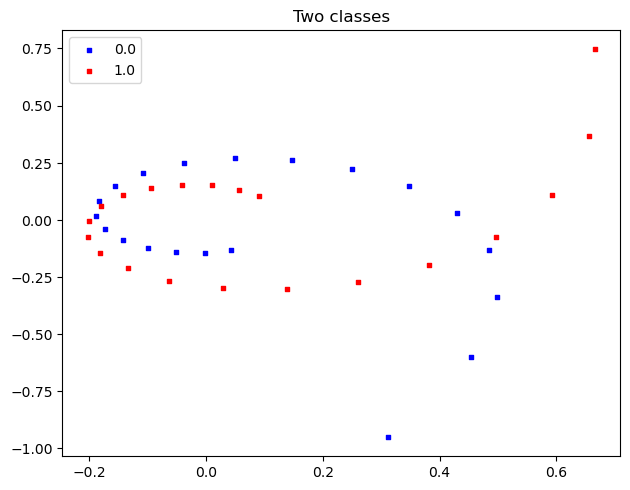

In [ ]:
#
fig = plt.figure()
ax1 = fig.add_subplot(111)
# df_cl1 = df[df.label == 0]
# df_cl2 = df[df.label == 1]
for i in range(dataset_size):
    if ys[i][0] == 0.:
        clr ='b'
    else:
        clr = 'r'
    ax1.scatter(xs[i][:, 0], xs[i][:, 1], s=5, c=clr, marker="s", label=ys[i][0])
#     ax1.scatter(df_cl2.x1, df_cl2.x2, s=5, c='r', marker="s", label='class2')
fig.tight_layout()
plt.title('Two classes')
plt.legend()


# plt.scatter(xs[0][:, 0], xs[0][:, 1])

In [ ]:
# larger data set
dataset_size = 100
batch_size = 10
seq_length = 20
data_key, model_key = jax.random.split(jax.random.PRNGKey(212), 2)
xs, ys = get_data(dataset_size, seq_length, key=data_key)
iter_data = dataloader((xs, ys), batch_size)


In [ ]:
xs.shape

(100, 20, 2)

In [ ]:
ys[:2]

Array([[0.],
       [0.]], dtype=float32)

In [ ]:
iter_data = dataloader(datasetHL, 100)

In [ ]:
for (x, y) in iter_data:
    print(x.shape, y.shape)

(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)


(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)


(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)


(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)


(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)
(100, 100) (100, 2)


KeyboardInterrupt: 

In [ ]:
class RNN(eqx.Module):
    hidden_size: int
    cell: eqx.Module
    linear: eqx.nn.Linear
    bias: jax.Array

    def __init__(self, in_size, out_size, hidden_size, *, key):
        ckey, lkey = jax.random.split(key)
        self.hidden_size = hidden_size
        self.cell = eqx.nn.GRUCell(in_size, hidden_size, key=ckey)
#         self.cell = eqx.nn.LSTMCell(in_size, hidden_size, key=ckey)
        self.linear = eqx.nn.Linear(hidden_size, out_size, use_bias=False, key=lkey)
        self.bias = jnp.zeros(out_size)

    def __call__(self, input):
        hidden = jnp.zeros((self.hidden_size,))

        def f(carry, inp):
            return self.cell(inp, carry), None

        out, _ = jax.lax.scan(f, hidden, input)
        # sigmoid because we're performing binary classification
        return jax.nn.sigmoid(self.linear(out) + self.bias)

In [ ]:
class RNNlstm(eqx.Module):
    hidden_size: int
    cell1: eqx.Module
    cell2: eqx.Module
    linear: eqx.nn.Linear
#     bias: jax.Array

    def __init__(self, in_size, out_size, hidden_size, *, key):
        c1key, c2key, lkey = jax.random.split(key, 3)
        self.hidden_size = hidden_size
#         self.cell = eqx.nn.GRUCell(in_size, hidden_size, key=ckey)
        self.cell1 = eqx.nn.LSTMCell(in_size, hidden_size, key=c1key)
        self.cell2 = eqx.nn.LSTMCell(hidden_size, hidden_size, key=c2key)
        self.linear = eqx.nn.Linear(hidden_size, out_size, use_bias=True, key=lkey)
#         self.bias = jnp.zeros(out_size)

    def __call__(self, xs):
        scan_fn = lambda state, x: (self.cell1(x, state), None)
        init_state = (jnp.zeros(self.cell1.hidden_size),
                      jnp.zeros(self.cell1.hidden_size))
        final_state, _ = jax.lax.scan(scan_fn, init_state, xs)

        return self.linear(final_state[0]) # + self.bias
#         return jax.nn.sigmoid(self.linear(final_state[0]) + self.bias)

In [ ]:
lstmeq = RNNlstm(2, 2, 32, key=model_key)

In [ ]:
lstmeq(xs[0][:5, :])

Array([0.13397285, 0.09302421], dtype=float32)

In [ ]:
lstmeq.cell

LSTMCell(
  weight_ih=f32[128,2],
  weight_hh=f32[128,32],
  bias=f32[128],
  input_size=2,
  hidden_size=32,
  use_bias=True
)

In [ ]:
lstmeq = RNNlstm(100, 2, 32, key=model_key)

In [ ]:
def main(
    dataset_size=100,
    batch_size=10,
    learning_rate=3e-3,
    steps=200,
    hidden_size=32,
    depth=1,
    seed=5678,
):
    data_key, model_key = jax.random.split(jax.random.PRNGKey(seed), 2)
    xs, ys = get_data(dataset_size, seq_length=14, key=data_key)
    iter_data = dataloader((xs, ys), batch_size)

    model = RNN(in_size=2, out_size=1, hidden_size=hidden_size, key=model_key)
#     model = RNNlstm(in_size=2, out_size=1, hidden_size=hidden_size, key=model_key)

    @eqx.filter_value_and_grad
    def compute_loss(model, x, y):
        pred_y = jax.vmap(model)(x)
        # Trains with respect to binary cross-entropy
        return -jnp.mean(y * jnp.log(pred_y) + (1 - y) * jnp.log(1 - pred_y))

    # Important for efficiency whenever you use JAX: wrap everything into a single JIT
    # region.
    @eqx.filter_jit
    def make_step(model, x, y, opt_state):
        loss, grads = compute_loss(model, x, y)
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        return loss, model, opt_state

    optim = optax.adam(learning_rate)
    opt_state = optim.init(model)
    for step, (x, y) in zip(range(steps), iter_data):
        loss, model, opt_state = make_step(model, x, y, opt_state)
        loss = loss.item()
        print(f"step={step}, loss={loss}")

    pred_ys = jax.vmap(model)(xs)
    num_correct = jnp.sum((pred_ys > 0.5) == ys)
    final_accuracy = (num_correct / dataset_size).item()
    print(f"final_accuracy={final_accuracy}")

In [ ]:
main()  # All right, let's run the code.

starting epoch 0
step=0, loss=0.7081233263015747
step=1, loss=0.6880833506584167
step=2, loss=0.6670365333557129
step=3, loss=0.6492072343826294
step=4, loss=0.628685712814331
step=5, loss=0.7848258018493652
step=6, loss=0.7960376739501953
step=7, loss=0.7989193797111511
step=8, loss=0.7965542674064636
step=9, loss=0.7902571558952332
starting epoch 1
step=10, loss=0.6111821532249451
step=11, loss=0.6148279309272766
step=12, loss=0.6153644919395447
step=13, loss=0.6149423718452454
step=14, loss=0.6114858984947205
step=15, loss=0.7869271636009216
step=16, loss=0.7895097732543945
step=17, loss=0.7881371378898621
step=18, loss=0.7853938937187195
step=19, loss=0.7801624536514282
starting epoch 2
step=20, loss=0.6177666187286377
step=21, loss=0.6210214495658875
step=22, loss=0.6220059394836426
step=23, loss=0.6227951645851135
step=24, loss=0.6206672787666321
step=25, loss=0.7737724184989929
step=26, loss=0.7754095196723938
step=27, loss=0.7729578018188477
step=28, loss=0.771012008190155
step

In [ ]:
model = RNN(in_size=2, out_size=1, hidden_size=32, key=model_key)

In [ ]:
model.cell.input_size

2

In [ ]:
model.cell.weight_hh.shape

(96, 32)

In [ ]:
model.cell.weight_ih.shape

(96, 2)

In [ ]:
model(xs[0][:2, :])

Array([0.47193635], dtype=float32)

In [ ]:
xs[0][:2, :]

Array([[-0.8662967 ,  0.49952984],
       [-0.6736304 ,  0.0267801 ]], dtype=float32)

In [ ]:
xs[0]

Array([[-0.8662967 ,  0.49952984],
       [-0.6736304 ,  0.0267801 ],
       [-0.45926854, -0.21823113],
       [-0.24502712, -0.3264408 ],
       [-0.05450387, -0.33652925],
       [ 0.09283558, -0.2775747 ],
       [ 0.18502338, -0.17752427],
       [ 0.21916799, -0.06335385],
       [ 0.20130827,  0.04121126],
       [ 0.1447245 ,  0.11829499],
       [ 0.06710994,  0.1577503 ],
       [-0.01282473,  0.15779418],
       [-0.07866701,  0.12425242],
       [-0.11894477,  0.06858669]], dtype=float32)

In [ ]:
data_key, model_key = random.split(jax.random.PRNGKey(212), 2)
lstmj = LSTMjax(100, 500, 2)
params = lstmj.initialize_params(model_key)
for i in params.keys():
    print(i, params[i].shape)

# optimizer
# import optax
learning_rate = 0.001
batch_size = 100
#data_loader = DataLoaderXY(datasetHL[0], datasetHL[1], batch_size=batch_size)

# train_size = X_train.shape[0]
num_epochs = 500
def fit(params: optax.Params, optimizer: optax.GradientTransformation) -> optax.Params:
    opt_state = optimizer.init(params)

    def l2_loss(params, x, y):
        y_pred = lstmj.forward(x, params)
        l2 = jnp.mean((y_pred[-3:] - y[-3:])**2)
        return l2

    @jax.jit
    def run_batch(params, opt_state, batch_x, batch_y):
        loss_value, grads = jax.value_and_grad(l2_loss)(params, batch_x, batch_y)
        updates, opt_state = optimizer.update(grads, opt_state, params)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss_value

    for i in range(num_epochs):
        data_loader = DataLoaderXY(datasetHL[0], datasetHL[1], batch_size=batch_size)
        j = 0
        for batch in data_loader:
            params, opt_state, loss_value = run_batch(params, opt_state, batch[0], batch[1])
#             if j % 2 == 0:
#                 print(f'batch {j}, loss: {loss_value}')
#             j += 1
        if i % 10 == 0: print(f'epoch {i}, loss: {loss_value}')
        i += 1

    return params

# Fit our parametrized function using the Adam optimizer

optimizer = optax.adam(learning_rate=learning_rate)
params = fit(params, optimizer)


In [ ]:
# apply to spy ts
def main_spy(
    batch_size=100,
    learning_rate=3e-2,
    steps=1000,
    hidden_size=64,
#     depth=1,
    seed=5678,
):
    data_key, model_key = jax.random.split(jax.random.PRNGKey(seed), 2)
#     xs, ys = get_data(dataset_size, seq_length=14, key=data_key)
    iter_data = dataloader(datasetHL111, batch_size)
#     iter_data = DataLoaderXY(datasetHL[0], datasetHL[1], batch_size=batch_size)

#    model = RNN(in_size=2, out_size=1, hidden_size=hidden_size, key=model_key)
    model = RNNlstm(in_size=2, out_size=2, hidden_size=hidden_size, key=model_key)

    @eqx.filter_value_and_grad
    def compute_loss(model, x, y):
        pred_y = jax.vmap(model)(x)
        l2 = jnp.mean((pred_y - y)**2)
        return l2
#         Trains with respect to binary cross-entropy
#         return -jnp.mean(y * jnp.log(pred_y) + (1 - y) * jnp.log(1 - pred_y))

    # Important for efficiency whenever you use JAX: wrap everything into a single JIT
    # region.
    @eqx.filter_jit
    def make_step(model, x, y, opt_state):
        loss, grads = compute_loss(model, x, y)
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        return loss, model, opt_state

    optim = optax.adam(learning_rate)
    opt_state = optim.init(model)
    for step, (x, y) in zip(range(steps), iter_data):
        loss, model, opt_state = make_step(model, x, y, opt_state)
        loss = loss.item()
        if step % 100 == 0: print(f"step={step}, loss={loss}")

    pred_ys = jax.vmap(model)(xs)
#     num_correct = jnp.sum((pred_ys > 0.5) == ys)
#     final_accuracy = (num_correct / dataset_size).item()
    final_loss = compute_loss(model, datasetHL111[0], datasetHL111[1])
    print(f"final_loss={final_loss}")
    return model

In [ ]:
iter_data = dataloader(datasetHL111, 100)
for step, (x, y) in zip(range(2), iter_data):
    print(step)
    print(x.shape)
    print(y.shape)


0
(100, 50, 2)
(100, 2)
1
(100, 50, 2)
(100, 2)


In [ ]:
model = main_spy(batch_size=100, steps=1000, hidden_size=64)

starting epoch 0
step=0, loss=1.1267670392990112
starting epoch 1
starting epoch 2
starting epoch 3
starting epoch 4
starting epoch 5
starting epoch 6
starting epoch 7
step=100, loss=0.0003193573502358049
starting epoch 8
starting epoch 9
starting epoch 10
starting epoch 11
starting epoch 12
starting epoch 13
starting epoch 14
starting epoch 15
step=200, loss=0.0014156115939840674
starting epoch 16
starting epoch 17
starting epoch 18
starting epoch 19
starting epoch 20
starting epoch 21
starting epoch 22
starting epoch 23
step=300, loss=0.00041224464075639844
starting epoch 24
starting epoch 25
starting epoch 26
starting epoch 27
starting epoch 28
starting epoch 29
starting epoch 30
step=400, loss=0.0006295951316133142
starting epoch 31
starting epoch 32
starting epoch 33
starting epoch 34
starting epoch 35
starting epoch 36
starting epoch 37
starting epoch 38
step=500, loss=0.00031347310869023204
starting epoch 39
starting epoch 40
starting epoch 41
starting epoch 42
starting epoch 43

In [ ]:
model(datasetHL111[0][-1])

Array([1.0074005 , 0.98364043], dtype=float32)

In [ ]:
datasetHL111[0][-1]

Array([[1.0010432 , 1.0071555 ],
       [0.98412615, 1.1107165 ],
       [0.9957643 , 1.0042644 ],
       [1.0199081 , 0.90392786],
       [1.0085351 , 0.92660004],
       [0.99899024, 1.0190114 ],
       [0.9887608 , 1.1057215 ],
       [0.993136  , 1.031496  ],
       [0.992917  , 1.0954199 ],
       [1.0185126 , 0.8556496 ],
       [1.0002666 , 0.98778355],
       [0.9956147 , 1.0429918 ],
       [1.0046724 , 0.9565218 ],
       [0.998256  , 0.9994097 ],
       [0.9986898 , 1.0059067 ],
       [1.00345   , 1.0052848 ],
       [0.99331737, 1.0508177 ],
       [1.012139  , 0.93774325],
       [1.0096332 , 0.9513929 ],
       [0.99854493, 1.0473521 ],
       [1.0004061 , 1.0237954 ],
       [0.98877716, 1.0766997 ],
       [0.9927551 , 1.0809498 ],
       [1.00866   , 0.9555666 ],
       [1.0129507 , 0.93782663],
       [1.000381  , 0.97270185],
       [0.9944548 , 1.0274915 ],
       [1.009501  , 0.87235224],
       [1.0144612 , 0.9329074 ],
       [0.9980838 , 1.0089041 ],
       [1.

In [ ]:
datasetHL111[1][-1]

Array([1.0225174 , 0.99747527], dtype=float32)

In [ ]:
data[[('Ret', 'SPY'), ('Ret', '^VIX')]].tail(50)

Ret          
                 SPY      ^VIX
Date                          
2023-05-02  0.988761  1.105721
2023-05-03  0.993136  1.031496
2023-05-04  0.992917  1.095420
2023-05-05  1.018513  0.855650
2023-05-08  1.000266  0.987784
2023-05-09  0.995615  1.042992
2023-05-10  1.004672  0.956522
2023-05-11  0.998256  0.999410
2023-05-12  0.998690  1.005907
2023-05-15  1.003450  1.005285
2023-05-16  0.993317  1.050818
2023-05-17  1.012139  0.937743
2023-05-18  1.009633  0.951393
2023-05-19  0.998545  1.047352
2023-05-22  1.000406  1.023795
2023-05-23  0.988777  1.076700
2023-05-24  0.992755  1.080950
2023-05-25  1.008660  0.955567
2023-05-26  1.012951  0.937827
2023-05-30  1.000381  0.972702
2023-05-31  0.994455  1.027491
2023-06-01  1.009501  0.872352
2023-06-02  1.014461  0.932907
2023-06-05  0.998084  1.008904
2023-06-06  1.002177  0.947726
2023-06-07  0.996542  0.998567
2023-06-08  1.006049  0.979197
2023-06-09  1.001794  1.013187
2023-06-12  1.009072  1.085322
2023-06-13  1.006593  0.973351
2023-06-14  1.001191  0.950034
2023-06-15  1.012398  1.044669
2023-06-16  0.996594  0.933793
2023-06-20  0.994812  1.025111
2023-06-21  0.994876  0.951009
2023-06-22  1.003610  0.978030
2023-06-23  0.992440  1.041053
2023-06-26  0.995914  1.060268
2023-06-27  1.010963  0.964211
2023-06-28  1.000504  0.977438
2023-06-29  1.003941  1.008191
2023-06-30  1.011801  1.003693
2023-07-03  1.001151  0.998528
2023-07-05  0.998513  1.044952
2023-07-06  0.992169  1.088857
2023-07-07  0.997475  0.960492
2023-07-10  1.002531  1.016183
2023-07-11  1.006369  0.984738
2023-07-12  1.008046  0.912399
2023-07-13  1.007937  1.005170

In [ ]:
model(jnp.array(data[[('Ret', 'SPY'), ('Ret', '^VIX')]].tail(50)))

Array([1.0061555, 0.9840479], dtype=float32)

#### Walk forward train/test cycle for a specified date range.

In [ ]:
def main_spy_wf(
    date,
    data, # pandas df
    batch_size=50,
    learning_rate=3e-2,
    steps=100,
    hidden_size=16,
#     depth=1,
    seed=5678,
):
    data_key, model_key = jax.random.split(jax.random.PRNGKey(seed), 2)
    dset_trainTS, test_x = prepTrainigSetAtDate(date, data, batch_size=batch_size)
#     iter_data = dataloader(dset_trainTS, batch_size)
#     iter_data = DataLoaderXY(datasetHL[0], datasetHL[1], batch_size=batch_size)

#    model = RNN(in_size=2, out_size=1, hidden_size=hidden_size, key=model_key)
    model = RNNlstm(in_size=2, out_size=2, hidden_size=hidden_size, key=model_key)

    @eqx.filter_value_and_grad
    def compute_loss(model, x, y):
        pred_y = jax.vmap(model)(x)
        l2 = jnp.mean((pred_y - y)**2)
        return l2
#         Trains with respect to binary cross-entropy
#         return -jnp.mean(y * jnp.log(pred_y) + (1 - y) * jnp.log(1 - pred_y))

    # Important for efficiency whenever you use JAX: wrap everything into a single JIT
    # region.
    @eqx.filter_jit
    def make_step(model, x, y, opt_state):
        loss, grads = compute_loss(model, x, y)
        updates, opt_state = optim.update(grads, opt_state)
        model = eqx.apply_updates(model, updates)
        return loss, model, opt_state

    optim = optax.adam(learning_rate)
    opt_state = optim.init(model)
    for step in range(steps):
        # use full training data in every step
        loss, model, opt_state = make_step(model, dset_trainTS[0], dset_trainTS[1], opt_state)
        loss = loss.item()
        if step % 10 == 0: print(f"step={step}, loss={loss}")

    pred_y = model(test_x)
#     final_loss = compute_loss(model, datasetHL111[0], datasetHL111[1])
#     print(f"final_loss={final_loss}")
#     return model
    return pred_y

In [ ]:
# dset_trainTS, test_x = prepTrainigSetAtDate('2023-07-14', data)

In [ ]:
pred_y = main_spy_wf(
    '2023-07-14',
    data, # pandas df
    batch_size=50,
    learning_rate=3e-2,
    steps=200,
    hidden_size=16,
    seed=212,
)
np.exp(pred_y)

NameError: name 'data' is not defined

In [ ]:
dates = pd.date_range(start='2023-05-01', end='2023-07-07', freq='B')
dates = dates[dates.isin(data.index)]
dates

DatetimeIndex(['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-08', '2023-05-09', '2023-05-10',
               '2023-05-11', '2023-05-12', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16', '2023-06-20', '2023-06-21',
               '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27',
               '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-03',
               '2023-07-05', '2023-07-06', '2023-07-07'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
l = []
for d in dates:
    preds = main_spy_wf(d, data, batch_size=10, steps=200, hidden_size=)
    print(preds)
    l.append(preds)

step=0, loss=0.0017501869006082416
step=10, loss=5.610095024108887
step=20, loss=0.13103024661540985
step=30, loss=0.0064748660661280155
step=40, loss=0.0018381845438852906
step=50, loss=0.003777878126129508
step=60, loss=0.0022188262082636356
step=70, loss=0.0002897168742492795
step=80, loss=0.00019555793551262468
step=90, loss=9.576497541274875e-05
step=100, loss=7.0026952016633e-05
step=110, loss=4.091154187335633e-05
step=120, loss=4.1840074118226767e-05
step=130, loss=4.084798274561763e-05
step=140, loss=3.9362192183034495e-05
step=150, loss=3.9078073314158246e-05
step=160, loss=3.892123277182691e-05
step=170, loss=3.88242733606603e-05
step=180, loss=3.8744121411582455e-05
step=190, loss=3.866172846755944e-05
[ 0.01030557 -0.00679606]
step=0, loss=0.0017467342549934983
step=10, loss=0.2811931073665619
step=20, loss=0.05880257487297058
step=30, loss=0.01422820519655943
step=40, loss=0.003423547837883234
step=50, loss=0.002292012330144644
step=60, loss=0.00017649811343289912
step=70

step=0, loss=0.00234016845934093
step=10, loss=0.1465047150850296
step=20, loss=0.6615361571311951
step=30, loss=0.105466328561306
step=40, loss=0.02620530128479004
step=50, loss=0.03808169439435005
step=60, loss=0.011398420669138432
step=70, loss=0.002466653473675251
step=80, loss=0.0007538283243775368
step=90, loss=0.0003835064417216927
step=100, loss=0.0002581873850431293
step=110, loss=0.00020327884703874588
step=120, loss=0.0001768302608979866
step=130, loss=0.00016079725173767656
step=140, loss=0.0001534046168671921
step=150, loss=0.00015343433187808841
step=160, loss=0.00015319041267503053
step=170, loss=0.00015275442274287343
step=180, loss=0.00015281359083019197
step=190, loss=0.00015274992620106786
[ 0.00690245 -0.01474823]
step=0, loss=0.0021959152072668076
step=10, loss=1.4596799612045288
step=20, loss=0.03293544426560402
step=30, loss=0.0030812197364866734
step=40, loss=0.001476626144722104
step=50, loss=0.0006630904972553253
step=60, loss=0.00023721174511592835
step=70, l

step=0, loss=0.0023166481405496597
step=10, loss=0.7477125525474548
step=20, loss=0.18429753184318542
step=30, loss=0.1293153613805771
step=40, loss=0.028592675924301147
step=50, loss=0.005131595768034458
step=60, loss=0.0016681910492479801
step=70, loss=0.0010111931478604674
step=80, loss=0.0007283705053851008
step=90, loss=0.00037148778210394084
step=100, loss=0.00012265580880921334
step=110, loss=0.0001031403080560267
step=120, loss=0.00010057831968879327
step=130, loss=8.759195043239743e-05
step=140, loss=8.834554319037125e-05
step=150, loss=8.608156349509954e-05
step=160, loss=8.551722567062825e-05
step=170, loss=8.486029400955886e-05
step=180, loss=8.418610377702862e-05
step=190, loss=8.358553168363869e-05
[ 0.01674813 -0.00925325]
step=0, loss=0.0022675050422549248
step=10, loss=4.346724510192871
step=20, loss=0.4403804540634155
step=30, loss=0.13228002190589905
step=40, loss=0.060407113283872604
step=50, loss=0.005721199791878462
step=60, loss=0.005170976277440786
step=70, loss

In [ ]:
(len(l), len(dates))

(47, 47)

In [ ]:
pred_df = pd.DataFrame(l, columns=['wh', 'wl'], index=dates)

In [ ]:
pred_df = pred_df.merge(data[[('hh', 'SPY'), ('ll', 'SPY')]], how='left', left_index=True, right_index=True)

/tmp/ipykernel_4103/3771618165.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  pred_df = pred_df.merge(data[[('hh', 'SPY'), ('ll', 'SPY')]], how='left', left_index=True, right_index=True)


In [ ]:
pred_df.head()

,wh,wl,"(hh, SPY)","(ll, SPY)"
2023-05-01,0.0059252307,-0.0016688667,-0.006689,-0.025299
2023-05-02,0.0083300695,-0.0033333711,0.004614,-0.013996
2023-05-03,0.0022533685,-0.027214494,0.011768,-0.007108
2023-05-04,0.00293497,-0.03109688,0.018876,0.014215
2023-05-05,0.007947236,-0.012138411,0.000533,-0.004128


<Axes: xlabel='wh', ylabel='(hh, SPY)'>

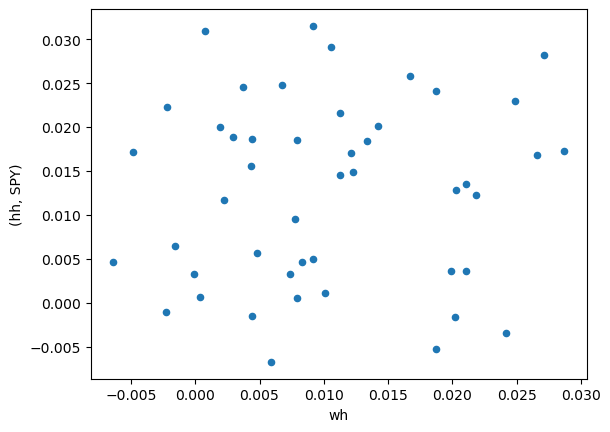

In [ ]:
pred_df.plot.scatter('wh', ('hh', 'SPY'))

<Axes: xlabel='wl', ylabel='(ll, SPY)'>

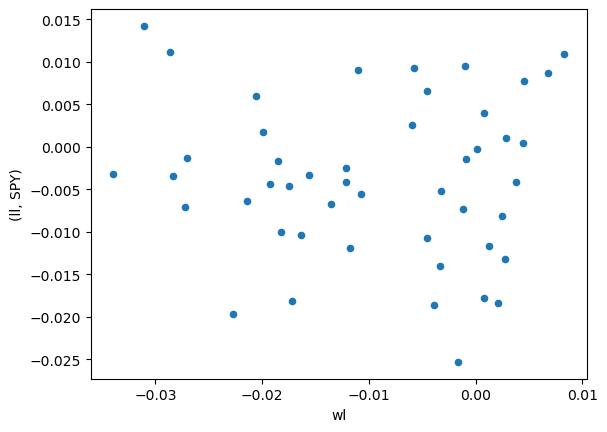

In [ ]:
pred_df.plot.scatter('wl', ('ll', 'SPY'))

In [ ]:
pred_df.columns

Index(['wh', 'wl', ('hh', 'SPY'), ('ll', 'SPY')], dtype='object')

In [ ]:
data.head()

Adj Close                         Close                    \
                   SPY         TLT  ^VIX         SPY         TLT  ^VIX   
Date                                                                     
2018-01-02  244.918686  111.429459  9.77  268.769989  125.489998  9.77   
2018-01-03  246.467804  111.962280  9.15  270.470001  126.089996  9.15   
2018-01-04  247.506668  111.944481  9.22  271.609985  126.070000  9.22   
2018-01-05  249.156006  111.624825  9.22  273.420013  125.709999  9.22   
2018-01-08  249.611740  111.553749  9.52  273.920013  125.629997  9.52   

                  High                            Low  ... Volume       Ret  \
                   SPY         TLT   ^VIX         SPY  ...   ^VIX       SPY   
Date                                                   ...                    
2018-01-02  268.809998  126.510002  11.07  267.399994  ...      0       NaN   
2018-01-03  270.640015  126.199997   9.65  268.959991  ...      0  1.006325   
2018-01-04  272.160004  126.160004   9.31  270.540009  ...      0  1.004215   
2018-01-05  273.559998  126.180000   9.54  271.950012  ...      0  1.006664   
2018-01-08  274.100006  126.029999   9.89  272.980011  ...      0  1.001829   

                  hh        ll       Ret        hh        ll       Ret  \
                 SPY       SPY      ^VIX      ^VIX      ^VIX       TLT   
Date                                                                     
2018-01-02  1.021468  1.006325       NaN  1.031730  0.936540       NaN   
2018-01-03  1.015048  1.004215  0.936540  1.101639  1.007650  1.004782   
2018-01-04  1.016604  1.006664  1.007650  1.093275  1.000000  0.999841   
2018-01-05  1.016458  1.001829  1.000000  1.101952  1.032538  0.997145   
2018-01-08  1.014602  1.000730  1.032538  1.224790  1.031513  0.999363   

                  hh        ll  
                 TLT       TLT  
Date                            
2018-01-02  1.004782  0.987728  
2018-01-03  0.999841  0.981838  
2018-01-04  0.997145  0.981994  
2018-01-05  0.999363  0.984806  
2018-01-08  0.995304  0.985434  

[5 rows x 27 columns]

#### LSTM implementation X

In [ ]:
import jax
import jax.numpy as np
from jax import random, grad, jit
import optax

class LSTM:
    def __init__(self, hidden_size, output_size):
        self.hidden_size = hidden_size
        self.output_size = output_size

    def initialize_params(self, rng):
        k1, k2, k3, k4 = random.split(rng, 4)
        input_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k1, (self.hidden_size, self.hidden_size))
        forget_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k2, (self.hidden_size, self.hidden_size))
        output_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k3, (self.hidden_size, self.hidden_size))
        cell_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k4, (self.hidden_size, self.hidden_size))
        output_weights_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k1, (self.hidden_size, self.output_size))
        return input_init, forget_init, output_init, cell_init, output_weights_init

    def lstm_cell(self, carry, inputs):
        hidden_state, cell_state = carry
        concat_input = np.concatenate([inputs, hidden_state], axis=-1)
        input_gate = np.sigmoid(np.dot(concat_input, self.input_weights))
        forget_gate = np.sigmoid(np.dot(concat_input, self.forget_weights))
        output_gate = np.sigmoid(np.dot(concat_input, self.output_weights))
        cell_candidate = np.tanh(np.dot(concat_input, self.cell_weights))
        new_cell_state = forget_gate * cell_state + input_gate * cell_candidate
        new_hidden_state = output_gate * np.tanh(new_cell_state)
        return new_hidden_state, (new_hidden_state, new_cell_state)

    def forward(self, inputs, params):
        self.input_weights, self.forget_weights, self.output_weights, self.cell_weights, self.output_weights = params
        _, final_state = jax.lax.scan(self.lstm_cell, (np.zeros((inputs.shape[0], self.hidden_size)),
                                                       np.zeros((inputs.shape[0], self.hidden_size))),
                                      inputs)
        return np.dot(final_state[0], self.output_weights)

    def loss(self, inputs, targets, params):
        predictions = self.forward(inputs, params)
        return np.mean((predictions - targets) ** 2)

    def update(self, inputs, targets, params, opt_state):
        loss_value, grads = jax.value_and_grad(self.loss)(inputs, targets, params)
        updates, new_opt_state = opt_update(grads, opt_state)
        new_params = optax.apply_updates(params, updates)
        return loss_value, new_params, new_opt_state

In [ ]:
def train_lstm_model(model, inputs, targets, num_epochs, learning_rate, batch_size):
    rng = jax.random.PRNGKey(0)
    params = model.initialize_params(rng)
#     opt_init, opt_update, get_params = optax.adam(learning_rate)
    optim = optax.adam(learning_rate)
    opt_state = optim.init(params)

    @jit
    def run_epoch(inputs, targets, params, opt_state):
        num_batches = inputs.shape[0] // batch_size
        losses = []
        for batch_idx in range(num_batches):
            batch_inputs = inputs[batch_idx * batch_size:(batch_idx + 1) * batch_size]
            batch_targets = targets[batch_idx * batch_size:(batch_idx + 1) * batch_size]
            loss_value, params, opt_state = model.update(batch_inputs, batch_targets, params, opt_state)
            losses.append(loss_value)
        return np.mean(losses), params, opt_state

    for epoch in range(num_epochs):
        loss_value, params, opt_state = run_epoch(inputs, targets, params, opt_state)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss_value}")

    return get_params(params)

In [ ]:
# Prepare your time series data (inputs and targets)

# Define hyperparameters
num_epochs = 100
learning_rate = 0.001
batch_size = 32
hidden_size = 64
output_size = 1

# Create an instance of the LSTM model
model = LSTM(hidden_size, output_size)

# Train the LSTM model
trained_params = train_lstm_model(model, inputs, targets, num_epochs, learning_rate, batch_size)

In [ ]:
import jax
import jax.numpy as np
from jax import random, grad, jit
import optax

class LSTM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

    def initialize_params(self, rng):
        k1, k2, k3, k4 = random.split(rng, 4)
        input_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k1, (self.input_size, self.hidden_size))
        forget_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k2, (self.input_size, self.hidden_size))
        output_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k3, (self.input_size, self.hidden_size))
        cell_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k4, (self.input_size, self.hidden_size))
        output_weights_init = np.sqrt(1.0 / self.hidden_size) * random.normal(k1, (self.hidden_size, self.output_size))
        return input_init, forget_init, output_init, cell_init, output_weights_init

    def lstm_cell(self, carry, inputs):
        hidden_state, cell_state = carry
        #concat_input = np.concatenate([inputs, hidden_state], axis=-1)
        input_gate = jax.nn.sigmoid(inputs@self.input_weights)
        forget_gate = jax.nn.sigmoid(np.dot(inputs, self.forget_weights))
        output_gate = jax.nn.sigmoid(np.dot(inputs, self.output_weights))
        cell_candidate = jax.nn.tanh(np.dot(inputs, self.cell_weights))
        new_cell_state = forget_gate * cell_state + input_gate * cell_candidate
        new_hidden_state = output_gate * jax.nn.tanh(new_cell_state)
        return new_hidden_state, (new_hidden_state, new_cell_state)

    def forward(self, inputs, params):
        self.input_weights, self.forget_weights, self.output_weights, self.cell_weights, self.output_weights = params
        print(inputs.shape[0], self.hidden_size)
        _, final_state = jax.lax.scan(self.lstm_cell, (np.zeros((inputs.shape[0], self.hidden_size)),
                                                       np.zeros((inputs.shape[0], self.hidden_size))),
                                      inputs)
        return np.dot(final_state[0], self.output_weights)

    def loss(self, inputs, targets, params):
        predictions = self.forward(inputs, params)
        return np.mean((predictions - targets) ** 2)

    def update(self, inputs, targets, params, opt_state):
        loss_value, grads = jax.value_and_grad(self.loss)(inputs, targets, params)
        updates, new_opt_state = opt_update(grads, opt_state)
        new_params = optax.apply_updates(params, updates)
        return loss_value, new_params, new_opt_state

In [ ]:
input_size = 50
hidden_size = 64
output_size = 2
model = LSTM(input_size, hidden_size, output_size)

In [ ]:
rng = jax.random.PRNGKey(0)
params = model.initialize_params(rng)
list(map(lambda i: i.shape, params))

[(50, 64), (50, 64), (50, 64), (50, 64), (64, 2)]

In [ ]:
jax.nn.sigmoid(np.array(df[0:50]).transpose()@params[0]).shape

(4, 64)

In [ ]:
jax.nn.sigmoid(np.dot(np.array(df[0:50]).transpose(), params[0])).shape

(4, 64)

In [ ]:
model.forward(np.array(df[0:50]).transpose(), params)

4 64


TypeError: Incompatible shapes for dot: got (50,) and (64, 2).

In [ ]:
params[0]@np.array(df[0:50])

TypeError: dot_general requires contracting dimensions to have the same shape, got (64,) and (50,).

In [ ]:
(np.array(df[0:50]).transpose()@params[0]).shape

(4, 64)

In [ ]:
type(np.array(df[0:100]))

jaxlib.xla_extension.ArrayImpl

In [ ]:
model.forward(np.array(df[0:100]))

(100, 64) (4,)


ValueError: too many values to unpack (expected 2)

In [ ]:
# Prepare your time series data (inputs and targets)

# Define hyperparameters
num_epochs = 100
learning_rate = 0.001
batch_size = 32
hidden_size = 64
output_size = 1

# Train the LSTM model
trained_params = train_lstm_model(inputs, targets, num_epochs, learning_rate, batch_size, hidden_size, output_size)


In [ ]:
import jax.numpy as jnp
import optax

class LSTM(jax.nn.Module):

    def __init__(self, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.W_i = jax.nn.Dense(hidden_size, activation="relu")
        self.W_f = jax.nn.Dense(hidden_size, activation="relu")
        self.W_o = jax.nn.Dense(hidden_size, activation="relu")
        self.W_c = jax.nn.Dense(hidden_size, activation="relu")

    def __call__(self, x, h, c):
        # x is the input sequence, h is the hidden state, and c is the cell state

        # Compute the forget gate
        f = self.W_f(x) * h

        # Compute the input gate
        i = self.W_i(x) * h

        # Compute the output gate
        o = self.W_o(x) * h

        # Compute the new cell state
        c_new = f * c + i * self.W_c(x)

        # Compute the new hidden state
        h_new = o * jnp.tanh(c_new)

        return h_new, c_new


AttributeError: module 'jax.nn' has no attribute 'Module'